<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo175-rva-a01378921-rrm-a01793108/blob/main/reto/notebook/TrabajoParte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

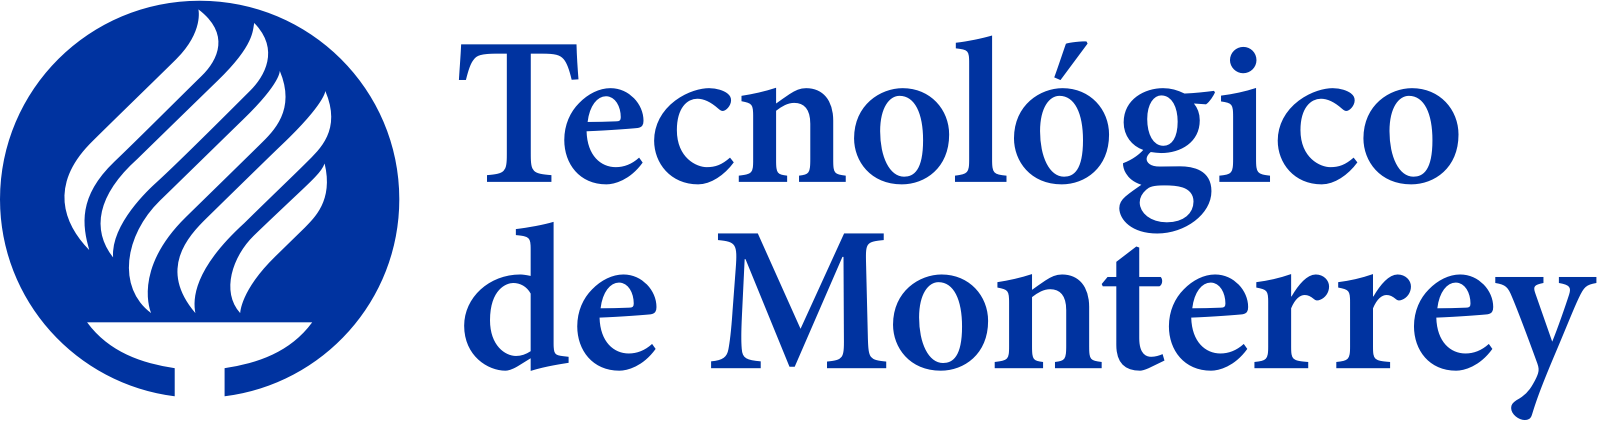

Materia: Ciencia y analítica de datos

Nombre de la actividad: ***Semana 9: Reto (Parte 1) Limpieza, análisis, visualización y kmeans***

Nombre de los alumnos:
* Ricardo Jonahthan Robayo
* Roberto Vega Alanis

Matrículas: 
* A01793108
* A01378921

Docente: Dra. María de la Paz Rico Fernández

Fecha: 15 de Noviembre de 2022

Librerías y configuraciones iniciales

In [178]:
# Instalación de librerías no contenidas en colab
! pip install geopandas qeds
! pip install qeds

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [179]:
# Librerías

## Para manipulación de datos estructurados
import pandas as pd 
import numpy as np

## Para visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

## Para aplicación de k-means
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min 

# Objetos de orquestación
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor # para generación de pipelines para variables predictoras y objetivo respectivamente

# Objectos de limpieza y preprocesamiento de datos
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

## Funciones para datos geográficos
import geopandas as gpd
from shapely.geometry import Point
import qeds
qeds.themes.mpl_style();

In [180]:
# Establecemos la paráetro en pandas que nos permite visualizar todas las columnas
pd.set_option('max_column',None)

Ingesta de los datos

Es importante mencionar que basados en las indicaciones de la profesora, hemos elegido el dataset de aguas sbterráneas paar nuestro trabajo.

In [181]:
# Ingesta de datos
url = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo175-rva-a01378921-rrm-a01793108/main/reto/dataset/DATOS_~1.CSV'

df_sub = pd.read_csv(url,encoding='latin1')
df_sub

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CALIDAD_ALC,CONDUCT_mS/cm,CALIDAD_CONDUC,SDT_mg/L,SDT_M_mg/L,CALIDAD_SDT_ra,CALIDAD_SDT_salin,FLUORUROS_mg/L,CALIDAD_FLUO,DUR_mg/L,CALIDAD_DUR,COLI_FEC_NMP/100_mL,CALIDAD_COLI_FEC,N_NO3_mg/L,CALIDAD_N_NO3,AS_TOT_mg/L,CALIDAD_AS,CD_TOT_mg/L,CALIDAD_CD,CR_TOT_mg/L,CALIDAD_CR,HG_TOT_mg/L,CALIDAD_HG,PB_TOT_mg/L,CALIDAD_PB,MN_TOT_mg/L,CALIDAD_MN,FE_TOT_mg/L,CALIDAD_FE,SEMAFORO,CONTAMINANTES,CUMPLE_CON_ALC,CUMPLE_CON_COND,CUMPLE_CON_SDT_ra,CUMPLE_CON_SDT_salin,CUMPLE_CON_FLUO,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,229.990,Alta,940.0,Permisible para riego,NaN,603.6,Cultivos sensibles,Potable - Dulce,0.9766,Potable - Optima,213.732,Potable - Dura,<1.1,Potable - Excelente,4.184656,Potable - Excelente,0.0161,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,0.0891,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,231.990,Alta,608.0,Buena para riego,NaN,445.4,Excelente para riego,Potable - Dulce,0.9298,Potable - Optima,185.0514,Potable - Dura,<1.1,Potable - Excelente,5.75011,Potable - Buena calidad,0.0134,Apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,204.920,Alta,532.0,Buena para riego,NaN,342,Excelente para riego,Potable - Dulce,1.8045,Alta,120.719,Potable - Dura,<1.1,Potable - Excelente,1.449803,Potable - Excelente,0.037,No apta como FAAP,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"FLUO,AS,",SI,SI,SI,SI,NO,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,327.000,Alta,686.0,Buena para riego,NaN,478.6,Excelente para riego,Potable - Dulce,1.1229,Potable - Optima,199.879,Potable - Dura,<1.1,Potable - Excelente,1.258597,Potable - Excelente,0.0154,Apta como FAAP,<0.003,Potable - Excelente,0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Verde,NaN,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,309.885,Alta,1841.0,Permisible para riego,NaN,1179,Cultivos con manejo especial,Ligeramente salobres,0.2343,Baja,476.9872,Potable - Dura,291,Aceptable,15.672251,No apta como FAAP,<0.01,Potable - Excelente,<0.003,Potable - Excelente,<0.005,Potable - Excelente,<0.0005,Potable - Excelente,<0.005,Potable - Excelente,<0.0015,Potable - Excelente,<0.025,Potable - Excelente,Rojo,"NO3,",SI,SI,SI,SI,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,231.045,Alta,2350.0,Dudosa para riego,NaN,1545.8,Cultivos con manejo especial,Ligeramente salobres,<0.2,Baja,752.096,Muy dura e indeseable usos industrial y domesti

# 1.- Limpieza de datos

In [182]:
# Resuman de los datos
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

## Manejo de valores nulos

In [183]:
# Revisamos en cuál de las columnas hay valores vacíos
df_sub.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

Inicialmente buscamos identificar la calidad de los datos disponibles, nos centramos completitud de la información y podemos observar que existen algunas columnas que tienen un alto nivel de datos perdidos, mientras que otras no superan la decena.

Las columnas que tienen un alto nivel de datos faltantes, por facilidad del ejercicio las retiramos. Claro está que debería darse un tratamiento, para completarlas siempre y cuando no se supere un 20%, como una regla usualmente implementada. Superado ese valor, estaríamos introduciendo ruido a las distrubiciones de nuestros datos.

De manera particular, observamos que las variables SDT_mg/L y CONTAMINANTES contienen una enorma cantidad de valores nulos, por lo tato lo más conveniente sería eliminarlas.

In [184]:
# Eliminación de columnas con excesiva cantidad de valores nulos
col_nuls = ['SDT_mg/L','CONTAMINANTES']
df_sub = df_sub.drop(labels = col_nuls, axis = 1)

Para el resto de variables con valores nulos, al ser despreciable la cantidad de valores nulos, podríamos prescindir de ellos directamente.

In [185]:
print('Cantidad de regostros previo a eliminación de registros con al menos un valor nulo: ',len(df_sub))

# Eliminación de registros con valores nulos
df_sub = df_sub.dropna()

print('Cantidad de regostros POSTERIOR a eliminación de registros con al menos un valor nulo: ',len(df_sub))

Cantidad de regostros previo a eliminación de registros con al menos un valor nulo:  1068
Cantidad de regostros POSTERIOR a eliminación de registros con al menos un valor nulo:  1054


Con lo anterior se comprueba que solo se perdieoron 16 registros, que representan sólo el 1.5% de los datos; una cantidad que por simplificación del análisi puede ser omitido.

In [186]:
# Comprobamos que no existen más valores nulos
df_sub.isnull().values.any()

False

## Análisis de variables categóricas

In [187]:
# Impresión de value counts de todas las variabels categóricas para identificación de anomalías generales
for col in df_sub.columns:
  print(pd.DataFrame(df_sub[col].value_counts(normalize = True)))

                CLAVE
DLAGU6       0.000949
OCFSU2989    0.000949
OCFSU2994    0.000949
OCFSU3048    0.000949
OCFSU3077    0.000949
...               ...
DLHID6458    0.000949
DLHID6461    0.000949
DLHID6463    0.000949
DLHID6467    0.000949
OCRBR5109M1  0.000949

[1054 rows x 1 columns]
                                     SITIO
POZO VILLA UNION                  0.001898
EL FUERTE                         0.001898
FINCA SANTA CRUZ                  0.000949
EST. JUAREZ                       0.000949
SANTA TERESA 2A. SECCION          0.000949
...                                    ...
POZO SAN FRANCISCO BOJAY COLONIA  0.000949
POZO SANTA ANA AHUEHUEPAN         0.000949
POZO SANTA MARIA DAXTHO           0.000949
POZO PEDRO MARIA ANAYA            0.000949
COMUNIDAD LA REFORMA              0.000949

[1052 rows x 1 columns]
                              ORGANISMO_DE_CUENCA
CUENCAS CENTRALES DEL NORTE              0.219165
LERMA SANTIAGO PACIFICO                  0.157495
PENINSULA DE YUCATAN

Del análisis anterior, observamos que las variables CLAVE, SITIO y ACUIFERO al ser variables identificadoras, no brindan información útil, por lo cual es conveniente eliminarlas.

In [188]:
# Columnas de identificación
col_id = ['SITIO', 'CLAVE','ACUIFERO']

Por otra parte, con respecto a variables geográficas tales como ESTADO y MUNICIPIO, al ser categorías con una excesiva cantidad de clases y no mostrar una jerarquización de los datos importante, se decide eliminarlas siendo que las variables de longitud y latitud deberían contener la misma información. De manera semejante, la columna ORGANISMO_DE_CUENCA hace referencia al nombre interno de las divisiones de las zonas de las cuencas, por lo que igualmente se decidió eliminar.

In [189]:
# Columnas de valores geográficos nominales
col_geo_nom = ['ESTADO','MUNICIPIO','ORGANISMO_DE_CUENCA']

Por otra parte, la columna PERIODO teiene un único valor, el cual no brind a utilidad al análisis.

Así mismo, la variable subtipo present un desbalanceo extremo del 97% para la calase mayoritaria, con lo que se decide igualmente liminarse inicialmente al no brindar una información jerárquica ni de tendencia apreciable.


In [190]:
# Eliminación de columnas
excluir = [ 'PERIODO','SUBTIPO'] + col_id + col_geo_nom
df_sub = df_sub.drop(labels = excluir, axis = 1)

Para identificar que tipo de tratamiento de datos es necesario aplicar en las características restantes, dado que el método info no nos cuenta más a detalle, debemos graficar o describir cómo se encuentran las variables numéricas y las frecuencias de las categóricas.

Es de mencionar que, se prefiere que los niveles de las variables categóricas al menos alcancen un valor del 5%, si no se tiene ese valor, podríamos considerar incorporarla a otra más grande o retiralas.

Para las variables numéricas, esperaríamos que se respete su formato entero o flotante de ser el caso, pues si presentan valores que representen a intervalos, y si son mayores al 20%, probablemente una imputación por media o mediana, no sea útil. En caso de presentarse esta particularidad, se eliminará la característica.

Finalmente, las variables categóricas son la categorización de las variables numéricas, es importante tener esto claro, para cuando pasemos a la fase del modelamiento. Dado que, por definicion deberíamos utilizar modelos que no se vean afectadas por esta redundancia y que puedan identificar cual de estas aporta más conocimiento.

Nota: por facilidad y limpieza del código no dejaremos todas la evaluaciones y análisis de las variables, incluso creamos loops para automatizar el preprocesamiento.

### Variables numéricas catalogadas como categóricas

Del análisis visual inicial notamos que existen columnas con valores numéricos que se muestran como categóricas por la presencia de elementos con el caracter "<". Estas deben ser evaluadas en su utilidad y en caso de ser funcionales, convertir su tipo de dato a flotante o entero según sea su caso.

Existen varias numéricas que en su mayoria contiene valores con una categoría que enuncia "< xx", por lo que daremos de baja a las que superen el 20% del total de la información, dado que no nos aportarían nada.

Por otra parte, aquellas que cuenten con menos del 20% de los datos se correiran con procesos de mapping sus valores con los valores de la media de dicha columna.

Se eliminan las celdas que no tienen informacion relevante

In [191]:
columnasAnalisis = list(df_sub.columns)

# Listas de almacenamiento de columnas para eliminación o corrección
excluir_num_ses = []
corregir = []

print('Columnas numéricas a eliminar por sesgo excesivo:')
## Por cada columna del dataset
for i in range(0,len(columnasAnalisis)):

  # Creación de DataFrame con cuenta de valores de cada clase para cada columna
  a = df_sub[columnasAnalisis[i]].value_counts()
  aux = pd.DataFrame([a.index, a])
  
  # Obtención del valor de la frecuencia de elemento con "<" para cada columna
  amayorque = str(aux.iloc[0,0]) 

  # Al ser siempre el valor que contiene "<" el primero se cuantifica la proporción de valores para este caso y para cada columna
  aporcent = aux.iloc[1,0]/1068

  # Si nos encontramos con una columna con el caso de contener elementos con "<" y la proporción del mismo es de más del 20% de los datos, agregamos a lista de eliminación
  if amayorque.startswith('<') == True and aporcent > 0.20:
    excluir_num_ses.append(columnasAnalisis[i])
    print('---------------')
    print(columnasAnalisis[i])
    print(amayorque)
    print(aporcent)

  # Por otra parte, si nos encontramos con una columna con el caso de contener elementos con "<" pero la proporción del mismo es menor del 20% de los datos, agregamos a lista de corrección
  if amayorque.startswith('<') == True and aporcent <= 0.20:
    corregir.append(columnasAnalisis[i])

Columnas numéricas a eliminar por sesgo excesivo:
---------------
COLI_FEC_NMP/100_mL
<1.1
0.6816479400749064
---------------
AS_TOT_mg/L
<0.01
0.7528089887640449
---------------
CD_TOT_mg/L
<0.003
0.9850187265917603
---------------
CR_TOT_mg/L
<0.005
0.7902621722846442
---------------
HG_TOT_mg/L
<0.0005
0.8960674157303371
---------------
PB_TOT_mg/L
<0.005
0.9588014981273408
---------------
MN_TOT_mg/L
<0.0015
0.5065543071161048
---------------
FE_TOT_mg/L
<0.025
0.3707865168539326


In [192]:
# Eliminamos las columnas con que cumplieron la condición de tener valors menores a un rango mínimo con proporción mayor al 20%
df_sub = df_sub.drop(labels = excluir_num_ses, axis = 1)

In [193]:
# Observamos columnas numéricas que necesitsas corrección
corregir

['FLUORUROS_mg/L', 'DUR_mg/L', 'N_NO3_mg/L']

Las variables que requieren corrección en este caso, deben de imputárseles un valor numérico que no afecte a la distribución de los datos

In [194]:
# Observamos proporción de los datos a corregir
for col in corregir:
  print(df_sub[col].value_counts(normalize = True))

<0.2      0.149905
0.466     0.002846
0.5202    0.002846
0.2158    0.001898
0.219     0.001898
            ...   
0.6045    0.000949
0.7042    0.000949
0.4343    0.000949
0.7178    0.000949
0.4002    0.000949
Name: FLUORUROS_mg/L, Length: 853, dtype: float64
<20        0.023719
121.512    0.004744
53.8542    0.003795
109.56     0.003795
148.44     0.002846
             ...   
51.454     0.000949
103        0.000949
24.8725    0.000949
71.6184    0.000949
362.544    0.000949
Name: DUR_mg/L, Length: 881, dtype: float64
<0.02       0.060721
0.096       0.002846
1.955       0.001898
0.2162      0.001898
0.029       0.001898
              ...   
0.7694      0.000949
1.2477      0.000949
0.0497      0.000949
0.1972      0.000949
0.811876    0.000949
Name: N_NO3_mg/L, Length: 983, dtype: float64


Observamos que los valores no numéricos comprenden el conjunto de valores del 15%, 2% y 6%. Para evitar un sesgo en los datos podríamos asignarles la media de los mismos, sin embargo, para mantener una parte relativa de la información de los mismos, asignamos estos valores el valor mínimo de su clase.

In [195]:
for col in corregir:
  # Obtenemos el valor mínimo de cada clase numérica. Para ello excluimos el valor no numérico, con vertimos la columna a flotante y obtenemos el valor mínimo de dicho rango.
  min_val = df_sub.drop(df_sub[df_sub[col].str.startswith('<')].index)[col].astype(float).min()
  
  # Sustituimos elementos con "<" con el valor mínimo
  df_sub.loc[df_sub[col].str.startswith('<'),col] = min_val

  # Convertimos columnas corregidas a valores numéricos
  df_sub[col] = df_sub[col].astype(float)

In [196]:
# Comprobamos que los datos fueron modificados
df_sub[corregir].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FLUORUROS_mg/L  1054 non-null   float64
 1   DUR_mg/L        1054 non-null   float64
 2   N_NO3_mg/L      1054 non-null   float64
dtypes: float64(3)
memory usage: 65.2 KB


Observamos que las variables hansido correctamente convertidas a valores numéricos y por lo tanto, ya no contienen valores sucios con signos "<". Esto nos permite iniciar nuestro análisis exploratorio de los datos.

Por último, convertimos el tipo de dato de la columna SDT_M_mg/L para que seaanalizada como variable numérica

In [197]:
# Conversión de columna
df_sub['SDT_M_mg/L'] = df_sub['SDT_M_mg/L'].astype(float)

# 2.- Explorar los datos (EDA)

* Identificando tendencias centrales promedio, media y mediana de los datos. 
* Identificar medidas de dispersión, máximo, mínimo.
* Identificar medidas de posición no centrales , los cuartiles , outliers.   
* Identificar correlaciones.
* Preparar los datos 

In [198]:
# Ahora, después de la limpieza inicial, nuestro datso se muestran de la siguiente manera
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1067
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LONGITUD              1054 non-null   float64
 1   LATITUD               1054 non-null   float64
 2   ALC_mg/L              1054 non-null   float64
 3   CALIDAD_ALC           1054 non-null   object 
 4   CONDUCT_mS/cm         1054 non-null   float64
 5   CALIDAD_CONDUC        1054 non-null   object 
 6   SDT_M_mg/L            1054 non-null   float64
 7   CALIDAD_SDT_ra        1054 non-null   object 
 8   CALIDAD_SDT_salin     1054 non-null   object 
 9   FLUORUROS_mg/L        1054 non-null   float64
 10  CALIDAD_FLUO          1054 non-null   object 
 11  DUR_mg/L              1054 non-null   float64
 12  CALIDAD_DUR           1054 non-null   object 
 13  CALIDAD_COLI_FEC      1054 non-null   object 
 14  N_NO3_mg/L            1054 non-null   float64
 15  CALIDAD_N_NO3        

## Visualización de variables numéricas

In [199]:
# Análisis de tendencia
df_sub.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,N_NO3_mg/L
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,-101.848270,23.161796,234.695266,1142.726471,896.945797,1.078667,349.939614,4.321700
std,6.697568,3.875005,111.147849,1248.990617,2765.757924,1.931149,360.918164,8.378307
min,-116.664250,14.561150,26.640000,110.000000,101.200000,0.200800,21.940600,0.020800
25%,-105.385170,20.224857,164.257500,506.000000,338.050000,0.269475,121.512000,0.651667
50%,-102.170665,22.640705,215.825000,820.000000,551.400000,0.506950,245.994450,2.082916
75%,-98.971268,25.508770,292.930000,1328.000000,915.600000,1.142400,455.617200,5.190385
max,-86.864120,32.677713,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,121.007813


In [200]:
# Obtenemos las columnas con valores numéricos
num_cols = [col for col in df_sub.columns if df_sub[col].dtype in ('float64','int')]
num_cols

['LONGITUD',
 'LATITUD',
 'ALC_mg/L',
 'CONDUCT_mS/cm',
 'SDT_M_mg/L',
 'FLUORUROS_mg/L',
 'DUR_mg/L',
 'N_NO3_mg/L']

### Análisis de distribución de los datos numéricos

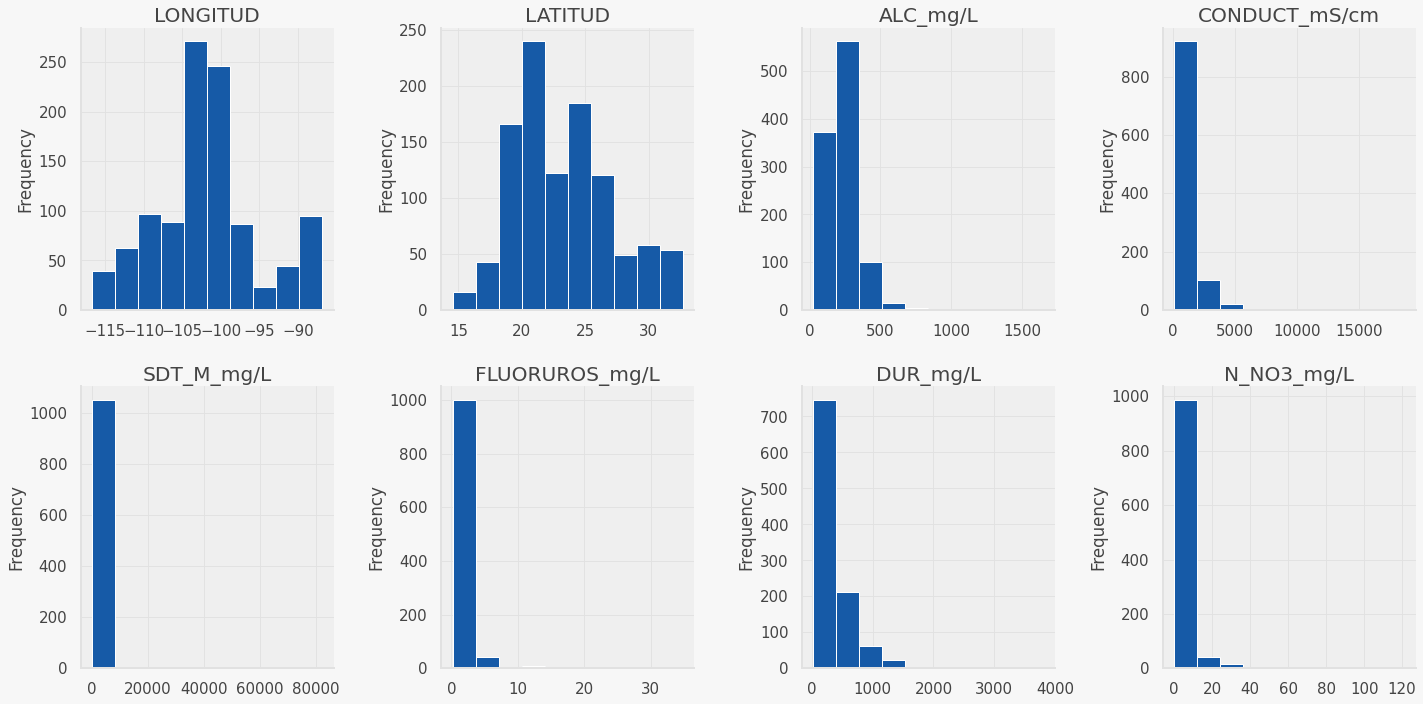

In [201]:
# Impresión de distribución de valores en variables numéricas

## Creación de subplots
fig, ax = plt.subplots(2,4, figsize = (20,10))

import math
import itertools

## Creación de subset con columnas con partícula "CALIDAD"
num_cols = [col for col in df_sub.columns if df_sub[col].dtype in ('float64','int')]

## Generación de los ejes pra subplots
filas = [0,1]
cols = [0,1,2,3]
sub = list(itertools.product(filas, cols))

## Impresión de bar chart por cada columna del DataFrame
for i, col in enumerate(num_cols):
  df_sub[col].plot(kind = 'hist', ax = ax[sub[i][0]][sub[i][1]], title = col, fontsize = 15, bins = 10)

## Para evitar overlapping
fig.tight_layout(h_pad=2)

## Impresión de gráficas
plt.show()

Debido a la necesidad de adaptación manual de bins para mejor visualización de los valores, se elige imprimir los gráficos de manera individual.

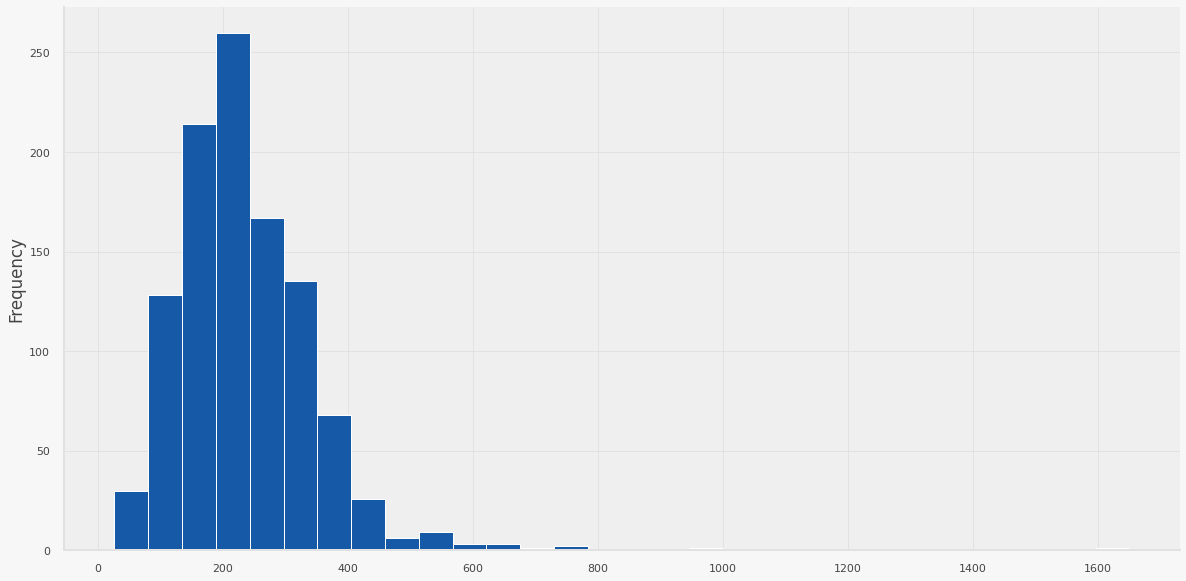

In [202]:
# Histograma para 'ALC_mg/L'
df_sub['ALC_mg/L'].plot(kind = 'hist', bins = 30)

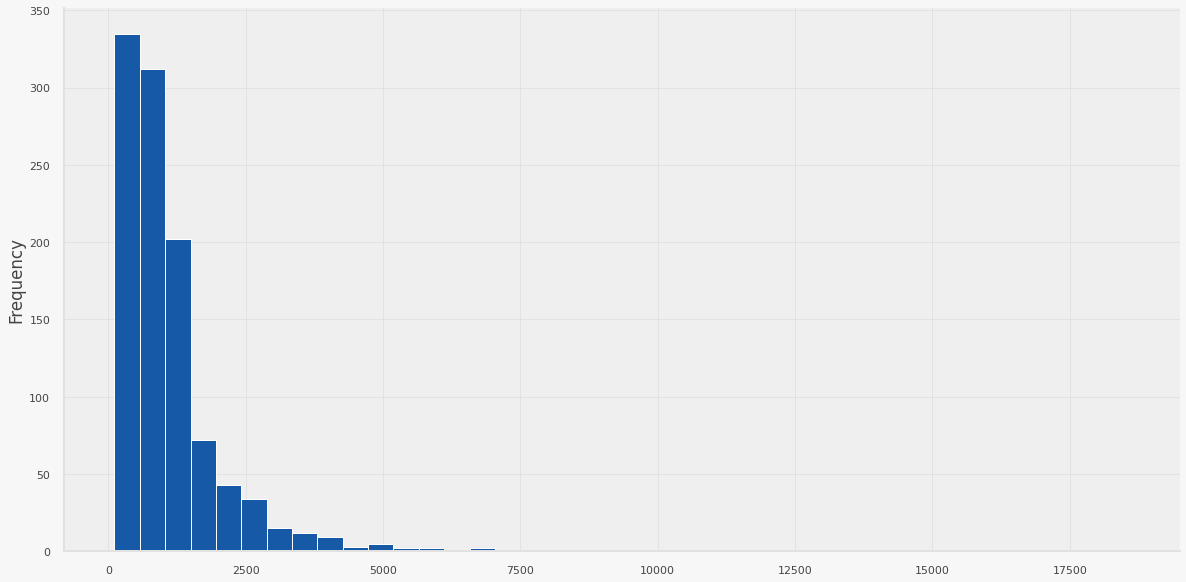

In [203]:
# Histograma para 'CONDUCT_mS/cm'
df_sub['CONDUCT_mS/cm'].plot(kind = 'hist', bins = 40)

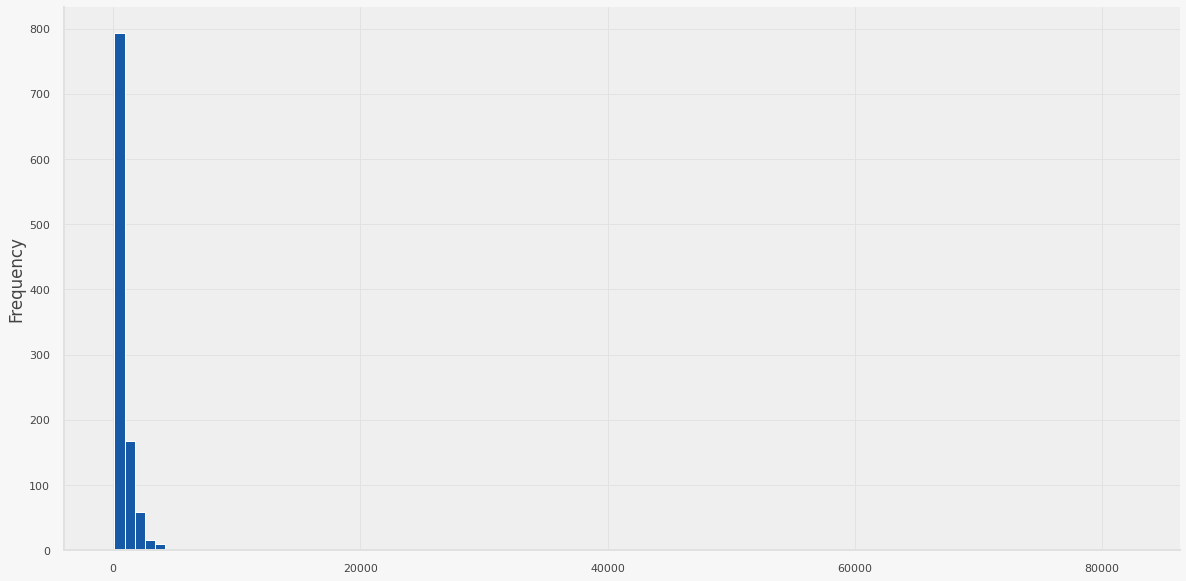

In [204]:
# Histograma para 'SDT_M_mg/L'
df_sub['SDT_M_mg/L'].plot(kind = 'hist', bins = 100)

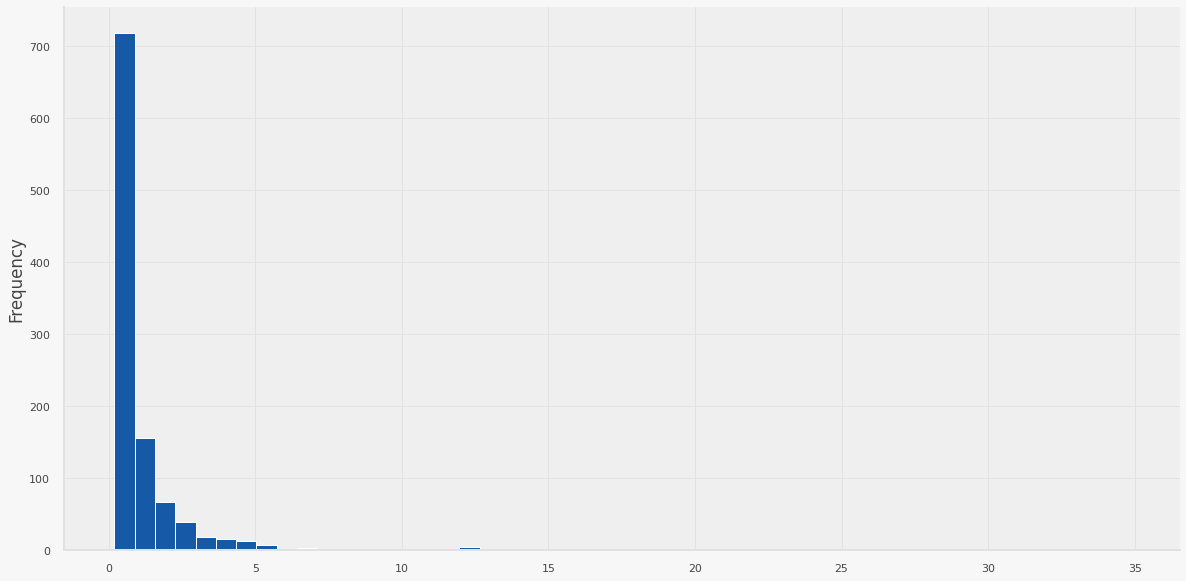

In [205]:
# Histograma para 'FLUORUROS_mg/L'
df_sub['FLUORUROS_mg/L'].plot(kind = 'hist', bins = 50)

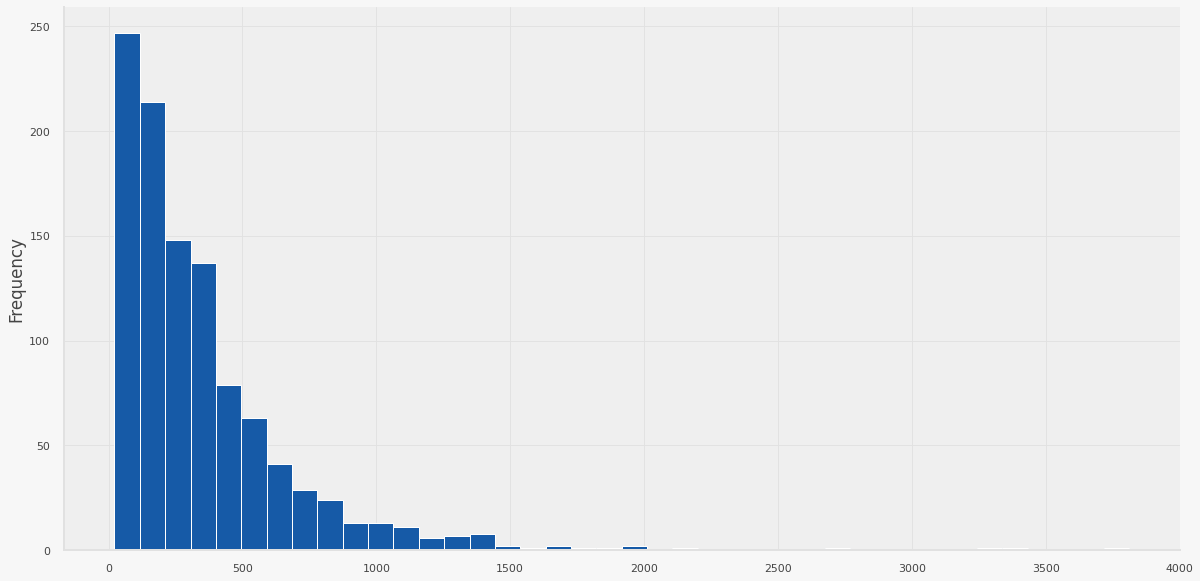

In [206]:
# Histograma para 'DUR_mg/L'
df_sub['DUR_mg/L'].plot(kind = 'hist', bins = 40)

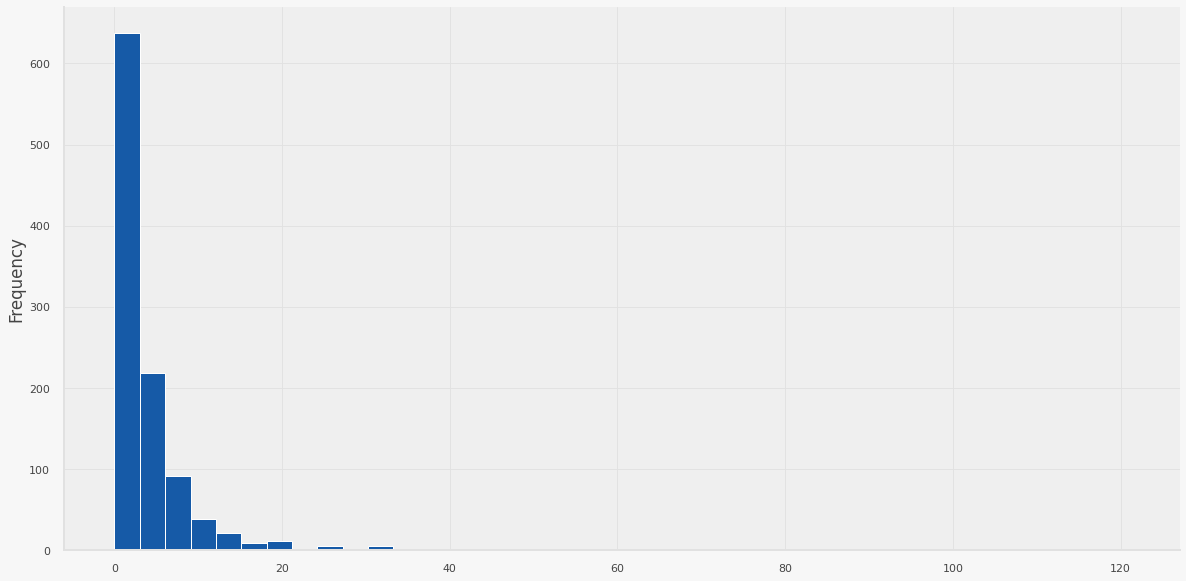

In [207]:
# Histograma para 'N_NO3_mg/L'
df_sub['N_NO3_mg/L'].plot(kind = 'hist', bins = 40)

A manera de resumen podemos generar un boxplot de todas las variables numéricas

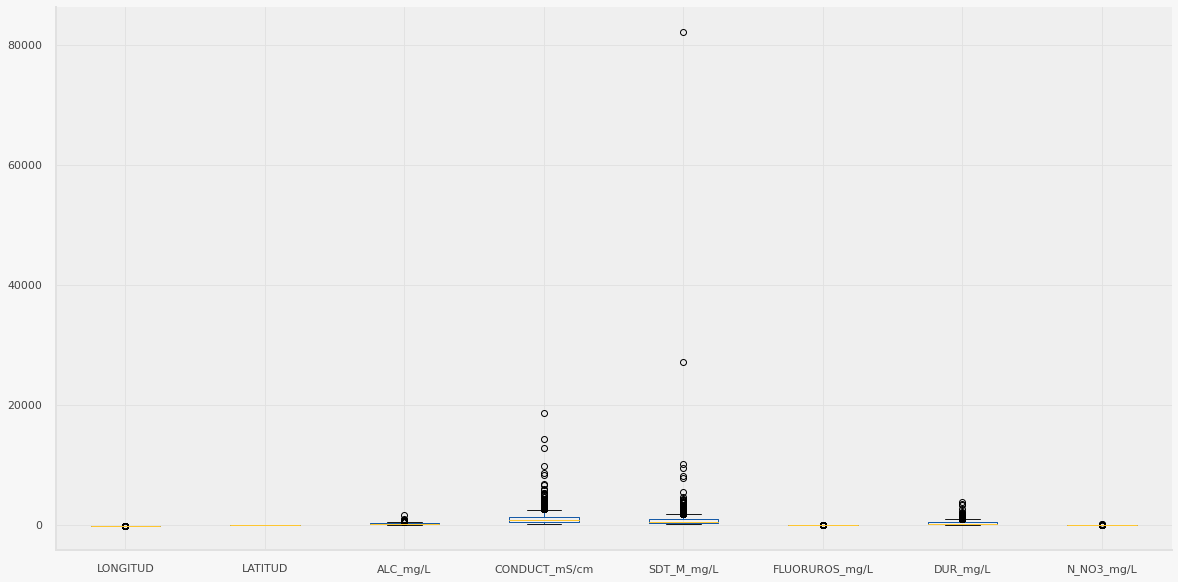

In [208]:
# Impresión de boxplot conjunto
df_sub[num_cols].boxplot()

En primera instancia, notamos sesgos marcados en las variables trabajadas, esto es probable a la distribución propia de las mismas pro rlo que no se´ri aoncveniente modificarlo. 

En segunda instancia, es importanta hacer notar que los histogramas denotan rangso de valores muy diferentes, esto nos indica que para el posible desarrollo de un modelo será necesaria la aplicación de algúnmétodo de escalamiento.

### Análisis de correlación de valores numéricos

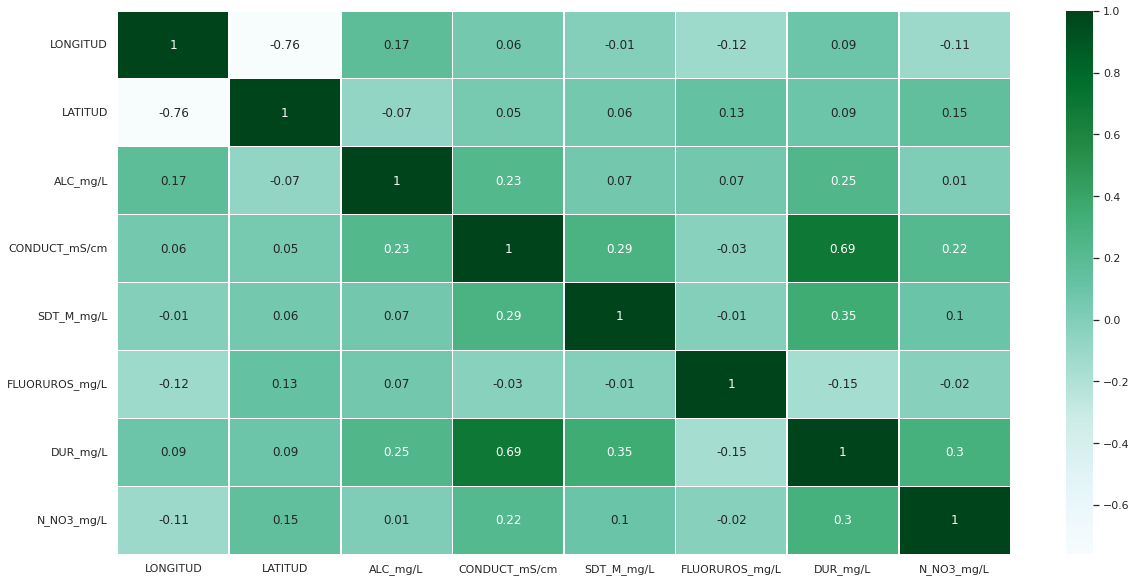

In [209]:
# Impresión de correlación de variables independientes
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df_sub[num_cols].corr().round(2), annot = True, linewidths=.5, cmap = 'BuGn')

De este análisis se puede observar que no existe correlación importante entre ninguna de las variables numéricas, salvo el caso de la correlación del 69% entre DUR_mg/L y CONDUCT_mS/cm. Adicionalmente, ALC_mg/L llega a tener una ligera correlación notoria enre ambas variables (de alrededor del 20%).

Por lo anterior, y ya que no existe una enorme cantidad de varaibles numéricas no sería de utilidad la aplicación de algún método de reducción de la dimensionalidad.

Para mayor detalle, generamos un pairplot con dichas variables

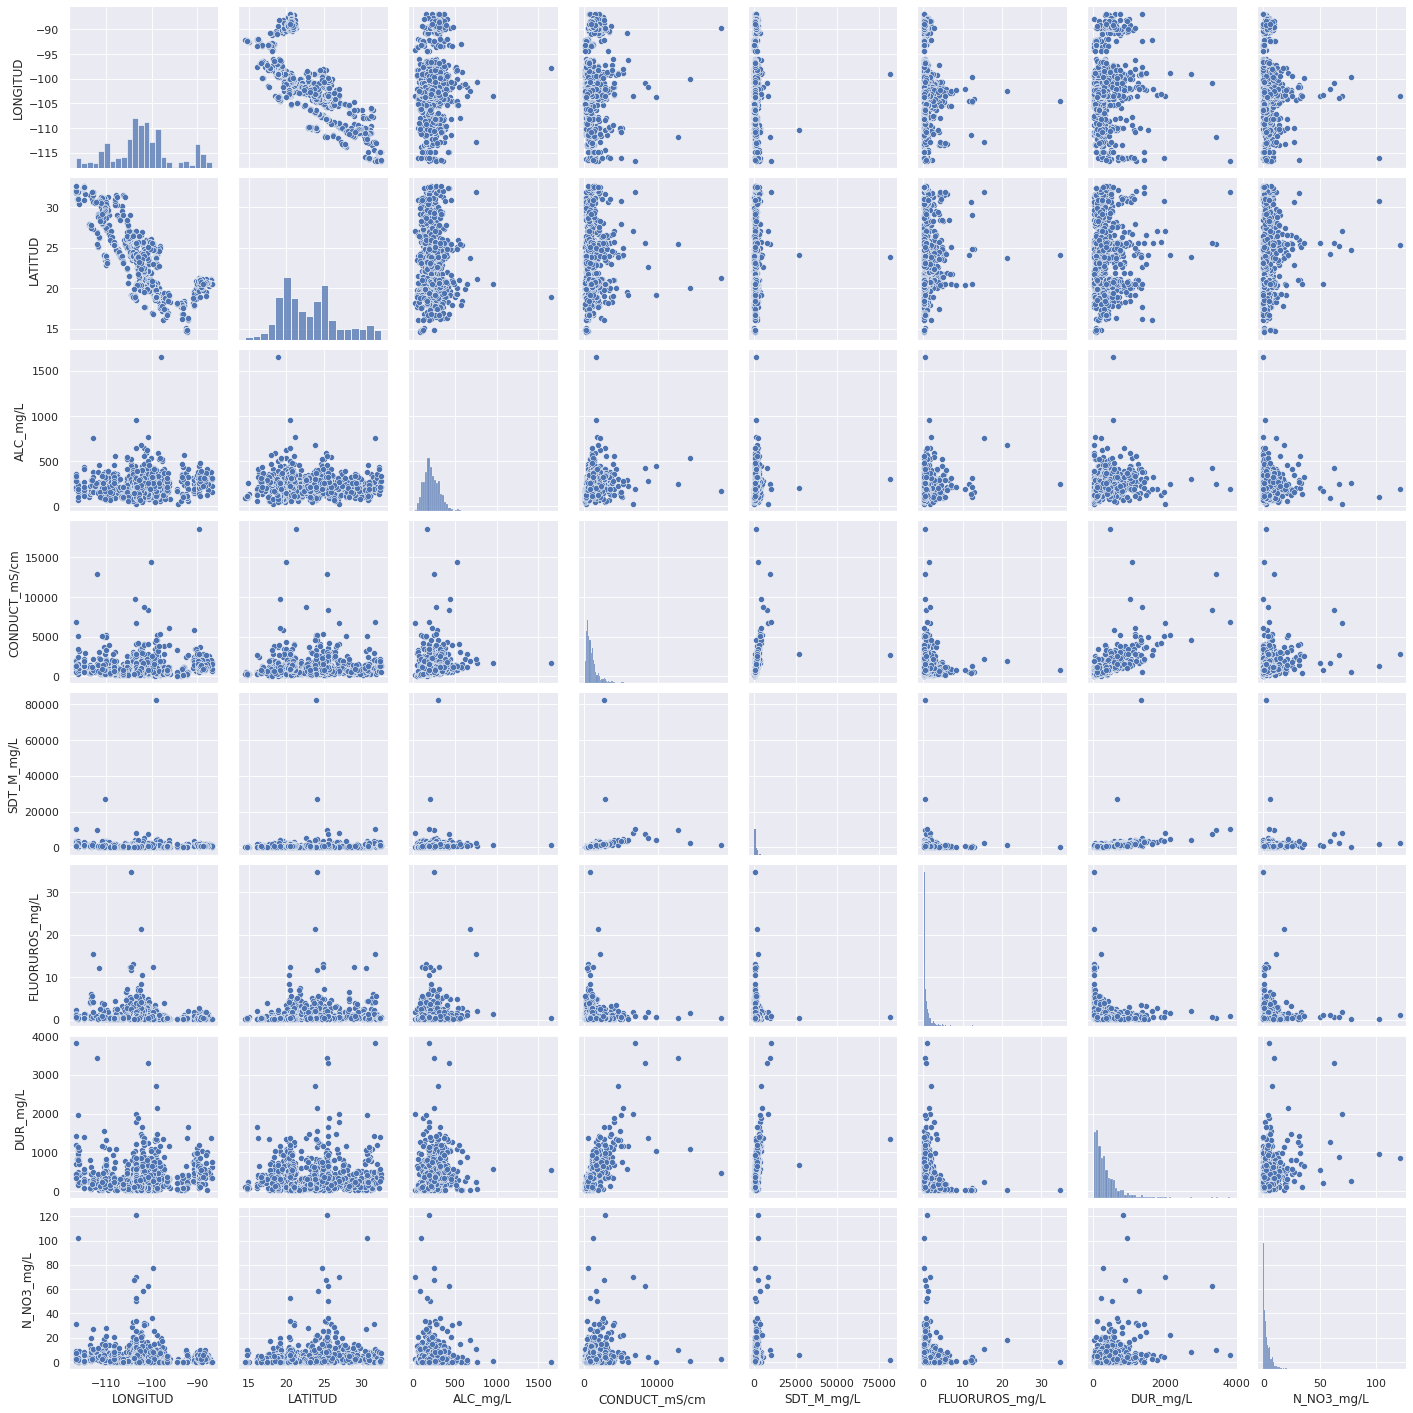

In [210]:
# Pairplot
sns.pairplot(df_sub[num_cols])

## Viasualización de variables categóricas

### Variables de calidad

In [211]:
for col in df_sub.columns:
  if col.startswith('CALIDAD'):
    print(col)

print('Cantidad de columnas de Calidad:',sum(x.startswith('CALIDAD') for x in df_sub.columns))

CALIDAD_ALC
CALIDAD_CONDUC
CALIDAD_SDT_ra
CALIDAD_SDT_salin
CALIDAD_FLUO
CALIDAD_DUR
CALIDAD_COLI_FEC
CALIDAD_N_NO3
CALIDAD_AS
CALIDAD_CD
CALIDAD_CR
CALIDAD_HG
CALIDAD_PB
CALIDAD_MN
CALIDAD_FE
Cantidad de columnas de Calidad: 15


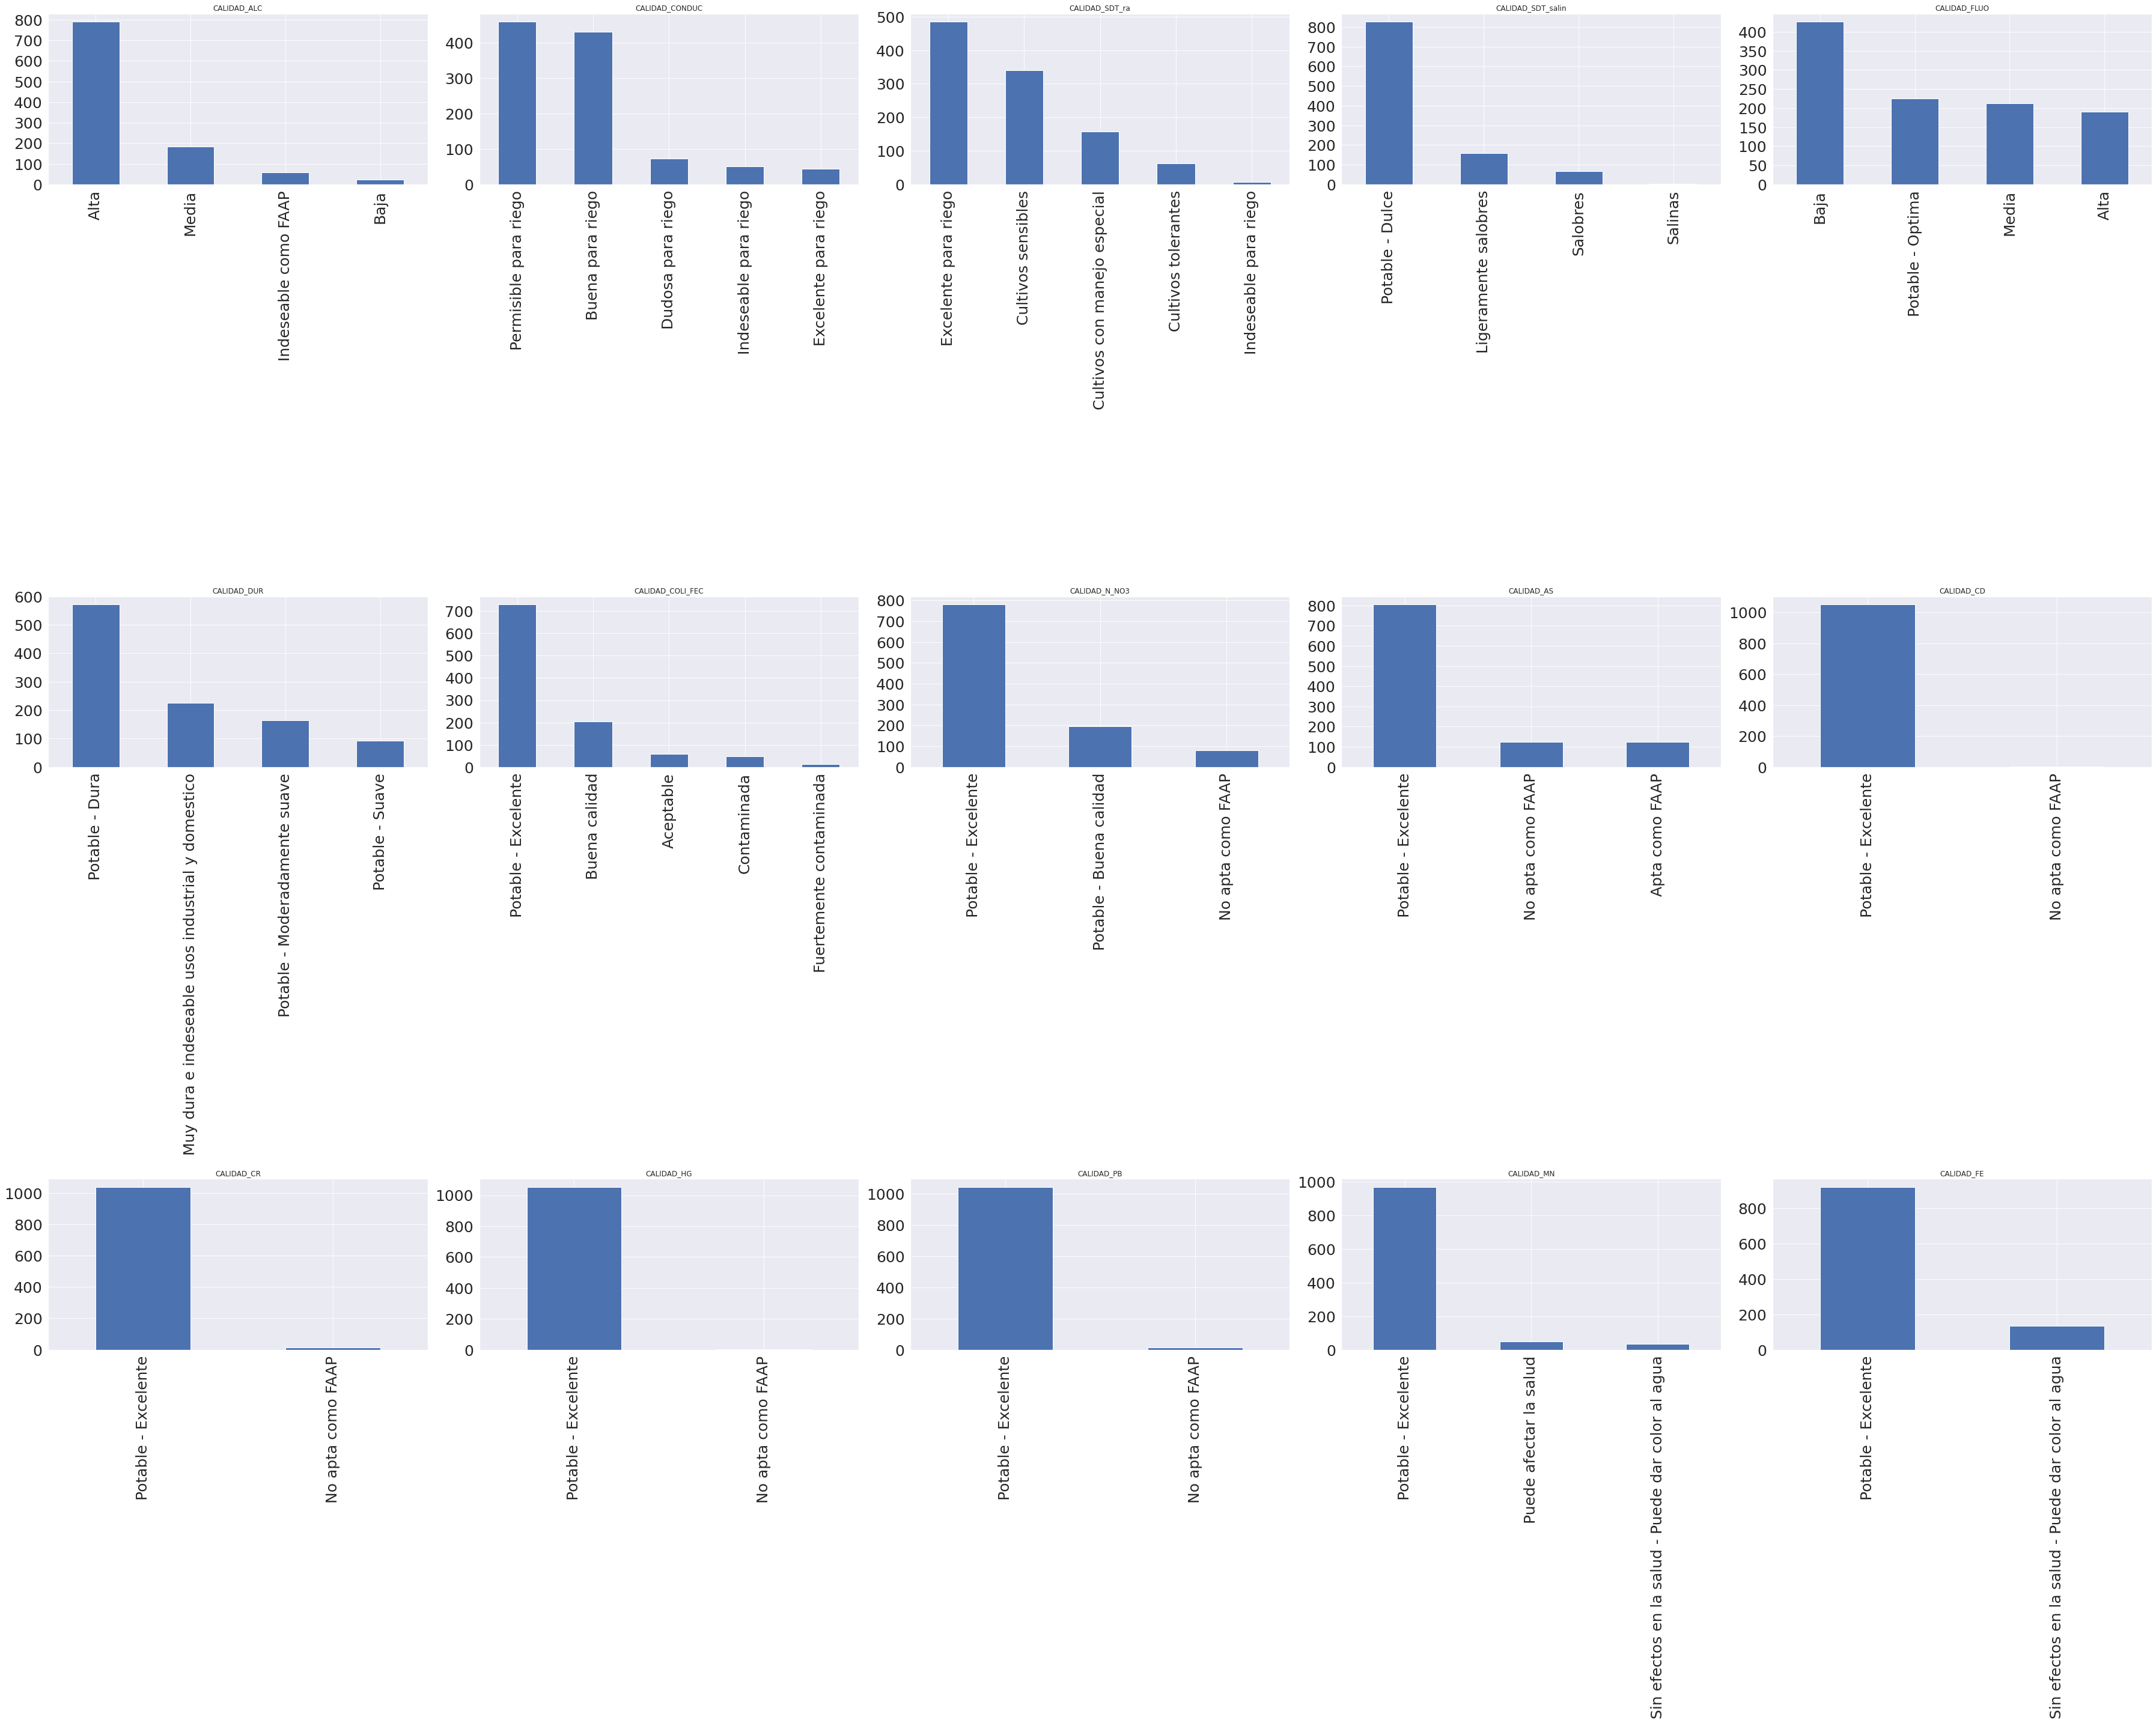

In [212]:
# Impresión de distribución de valores en variables categóoricas de calidad

## Creación de subplots
fig, ax = plt.subplots(3,5, figsize = (50,40))

import math
import itertools

## Creación de subset con columnas con partícula "CALIDAD"
cal_col = [col for col in df_sub.columns if col.startswith('CALIDAD')]

## Generación de los ejes pra subplots
filas = [0,1,2]
cols = [0,1,2,3,4]
sub = list(itertools.product(filas, cols))

## Impresión de bar chart por cada columna del DataFrame
for i, col in enumerate(cal_col):
  df_sub[col].value_counts().plot(kind = 'bar', ax = ax[sub[i][0]][sub[i][1]], title = col, fontsize = 25)

## Para evitar overlapping
fig.tight_layout(h_pad=2)

## Impresión de gráficas
plt.show()

De este conjunto de variables se observa en todos los caos una clase predominante, sin embargo, existe para algunos casos la presencia de valores de otras clases con lo cual se cree que brinden variabilidad, estas es conveniente conservarlas.

Adicionalmente, se observa que las clases muestran una jerarquía entre ellas, es por ello que, para este teipo de variables es conveniente solo obtener valores dummies pero no aplicar OneHot encoding a las mismas.

In [213]:
# Observamos si los valores se encuentran ordenados según jerarquía
for col in cal_col:
  print(df_sub[col].value_counts())

Alta                    790
Media                   184
Indeseable como FAAP     57
Baja                     23
Name: CALIDAD_ALC, dtype: int64
Permisible para riego    458
Buena para riego         429
Dudosa para riego         72
Indeseable para riego     51
Excelente para riego      44
Name: CALIDAD_CONDUC, dtype: int64
Excelente para riego            485
Cultivos sensibles              341
Cultivos con manejo especial    158
Cultivos tolerantes              63
Indeseable para riego             7
Name: CALIDAD_SDT_ra, dtype: int64
Potable - Dulce         826
Ligeramente salobres    158
Salobres                 67
Salinas                   3
Name: CALIDAD_SDT_salin, dtype: int64
Baja                426
Potable - Optima    225
Media               213
Alta                190
Name: CALIDAD_FLUO, dtype: int64
Potable - Dura                                       572
Muy dura e indeseable usos industrial y domestico    225
Potable - Moderadamente suave                        165
Potable - S

Se observa la existencia de una jerarquía pero esta tendría que ser determinada manualmente.

In [214]:
# Análisis para convertir variables categóricas con jerarquía a valores numéricos
df_sub_test = df_sub.copy()
for col in cal_col:
  df_sub_test[col] = df_sub[col].astype('category')

In [215]:
for col in cal_col:
  print(col)
  d = dict(enumerate(df_sub_test[col].cat.categories))
  print (d,'\n--------------------------------------------------------\n')

CALIDAD_ALC
{0: 'Alta', 1: 'Baja', 2: 'Indeseable como FAAP', 3: 'Media'} 
--------------------------------------------------------

CALIDAD_CONDUC
{0: 'Buena para riego', 1: 'Dudosa para riego', 2: 'Excelente para riego', 3: 'Indeseable para riego', 4: 'Permisible para riego'} 
--------------------------------------------------------

CALIDAD_SDT_ra
{0: 'Cultivos con manejo especial', 1: 'Cultivos sensibles', 2: 'Cultivos tolerantes', 3: 'Excelente para riego', 4: 'Indeseable para riego'} 
--------------------------------------------------------

CALIDAD_SDT_salin
{0: 'Ligeramente salobres', 1: 'Potable - Dulce', 2: 'Salinas', 3: 'Salobres'} 
--------------------------------------------------------

CALIDAD_FLUO
{0: 'Alta', 1: 'Baja', 2: 'Media', 3: 'Potable - Optima'} 
--------------------------------------------------------

CALIDAD_DUR
{0: 'Muy dura e indeseable usos industrial y domestico', 1: 'Potable - Dura', 2: 'Potable - Moderadamente suave', 3: 'Potable - Suave'} 
-----------

Observamos que la asignación es incorrecta, por lo tanto, se mantendrá la codificación binaria con get_dummies por el momento con el fin de simplificar el proprocesamiento inicial.

Por lo anteiror, mantendremos el resto del análisis con las variables de calidad como OneHotEncoding.

In [217]:
# Convertir variables a dummies
df_sub = pd.get_dummies(df_sub,columns = cal_col, drop_first = True) # Aplicamos drop first con el fin de evitar la generación de columnas redundantes

In [218]:
# Verificamos efecto de aplicación de dummies
df_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1067
Data columns (total 59 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   LONGITUD                                                      1054 non-null   float64
 1   LATITUD                                                       1054 non-null   float64
 2   ALC_mg/L                                                      1054 non-null   float64
 3   CONDUCT_mS/cm                                                 1054 non-null   float64
 4   SDT_M_mg/L                                                    1054 non-null   float64
 5   FLUORUROS_mg/L                                                1054 non-null   float64
 6   DUR_mg/L                                                      1054 non-null   float64
 7   N_NO3_mg/L                                                    1054 no

### Variables de cumplimiento

In [219]:
for col in df_sub.columns:
  if col.startswith('CUMPLE'):
    print(col)

print('Cantidad de columnas de "CUMPLE":',sum(x.startswith('CALIDAD') for x in df_sub.columns))

CUMPLE_CON_ALC
CUMPLE_CON_COND
CUMPLE_CON_SDT_ra
CUMPLE_CON_SDT_salin
CUMPLE_CON_FLUO
CUMPLE_CON_DUR
CUMPLE_CON_CF
CUMPLE_CON_NO3
CUMPLE_CON_AS
CUMPLE_CON_CD
CUMPLE_CON_CR
CUMPLE_CON_HG
CUMPLE_CON_PB
CUMPLE_CON_MN
CUMPLE_CON_FE
Cantidad de columnas de "CUMPLE": 35


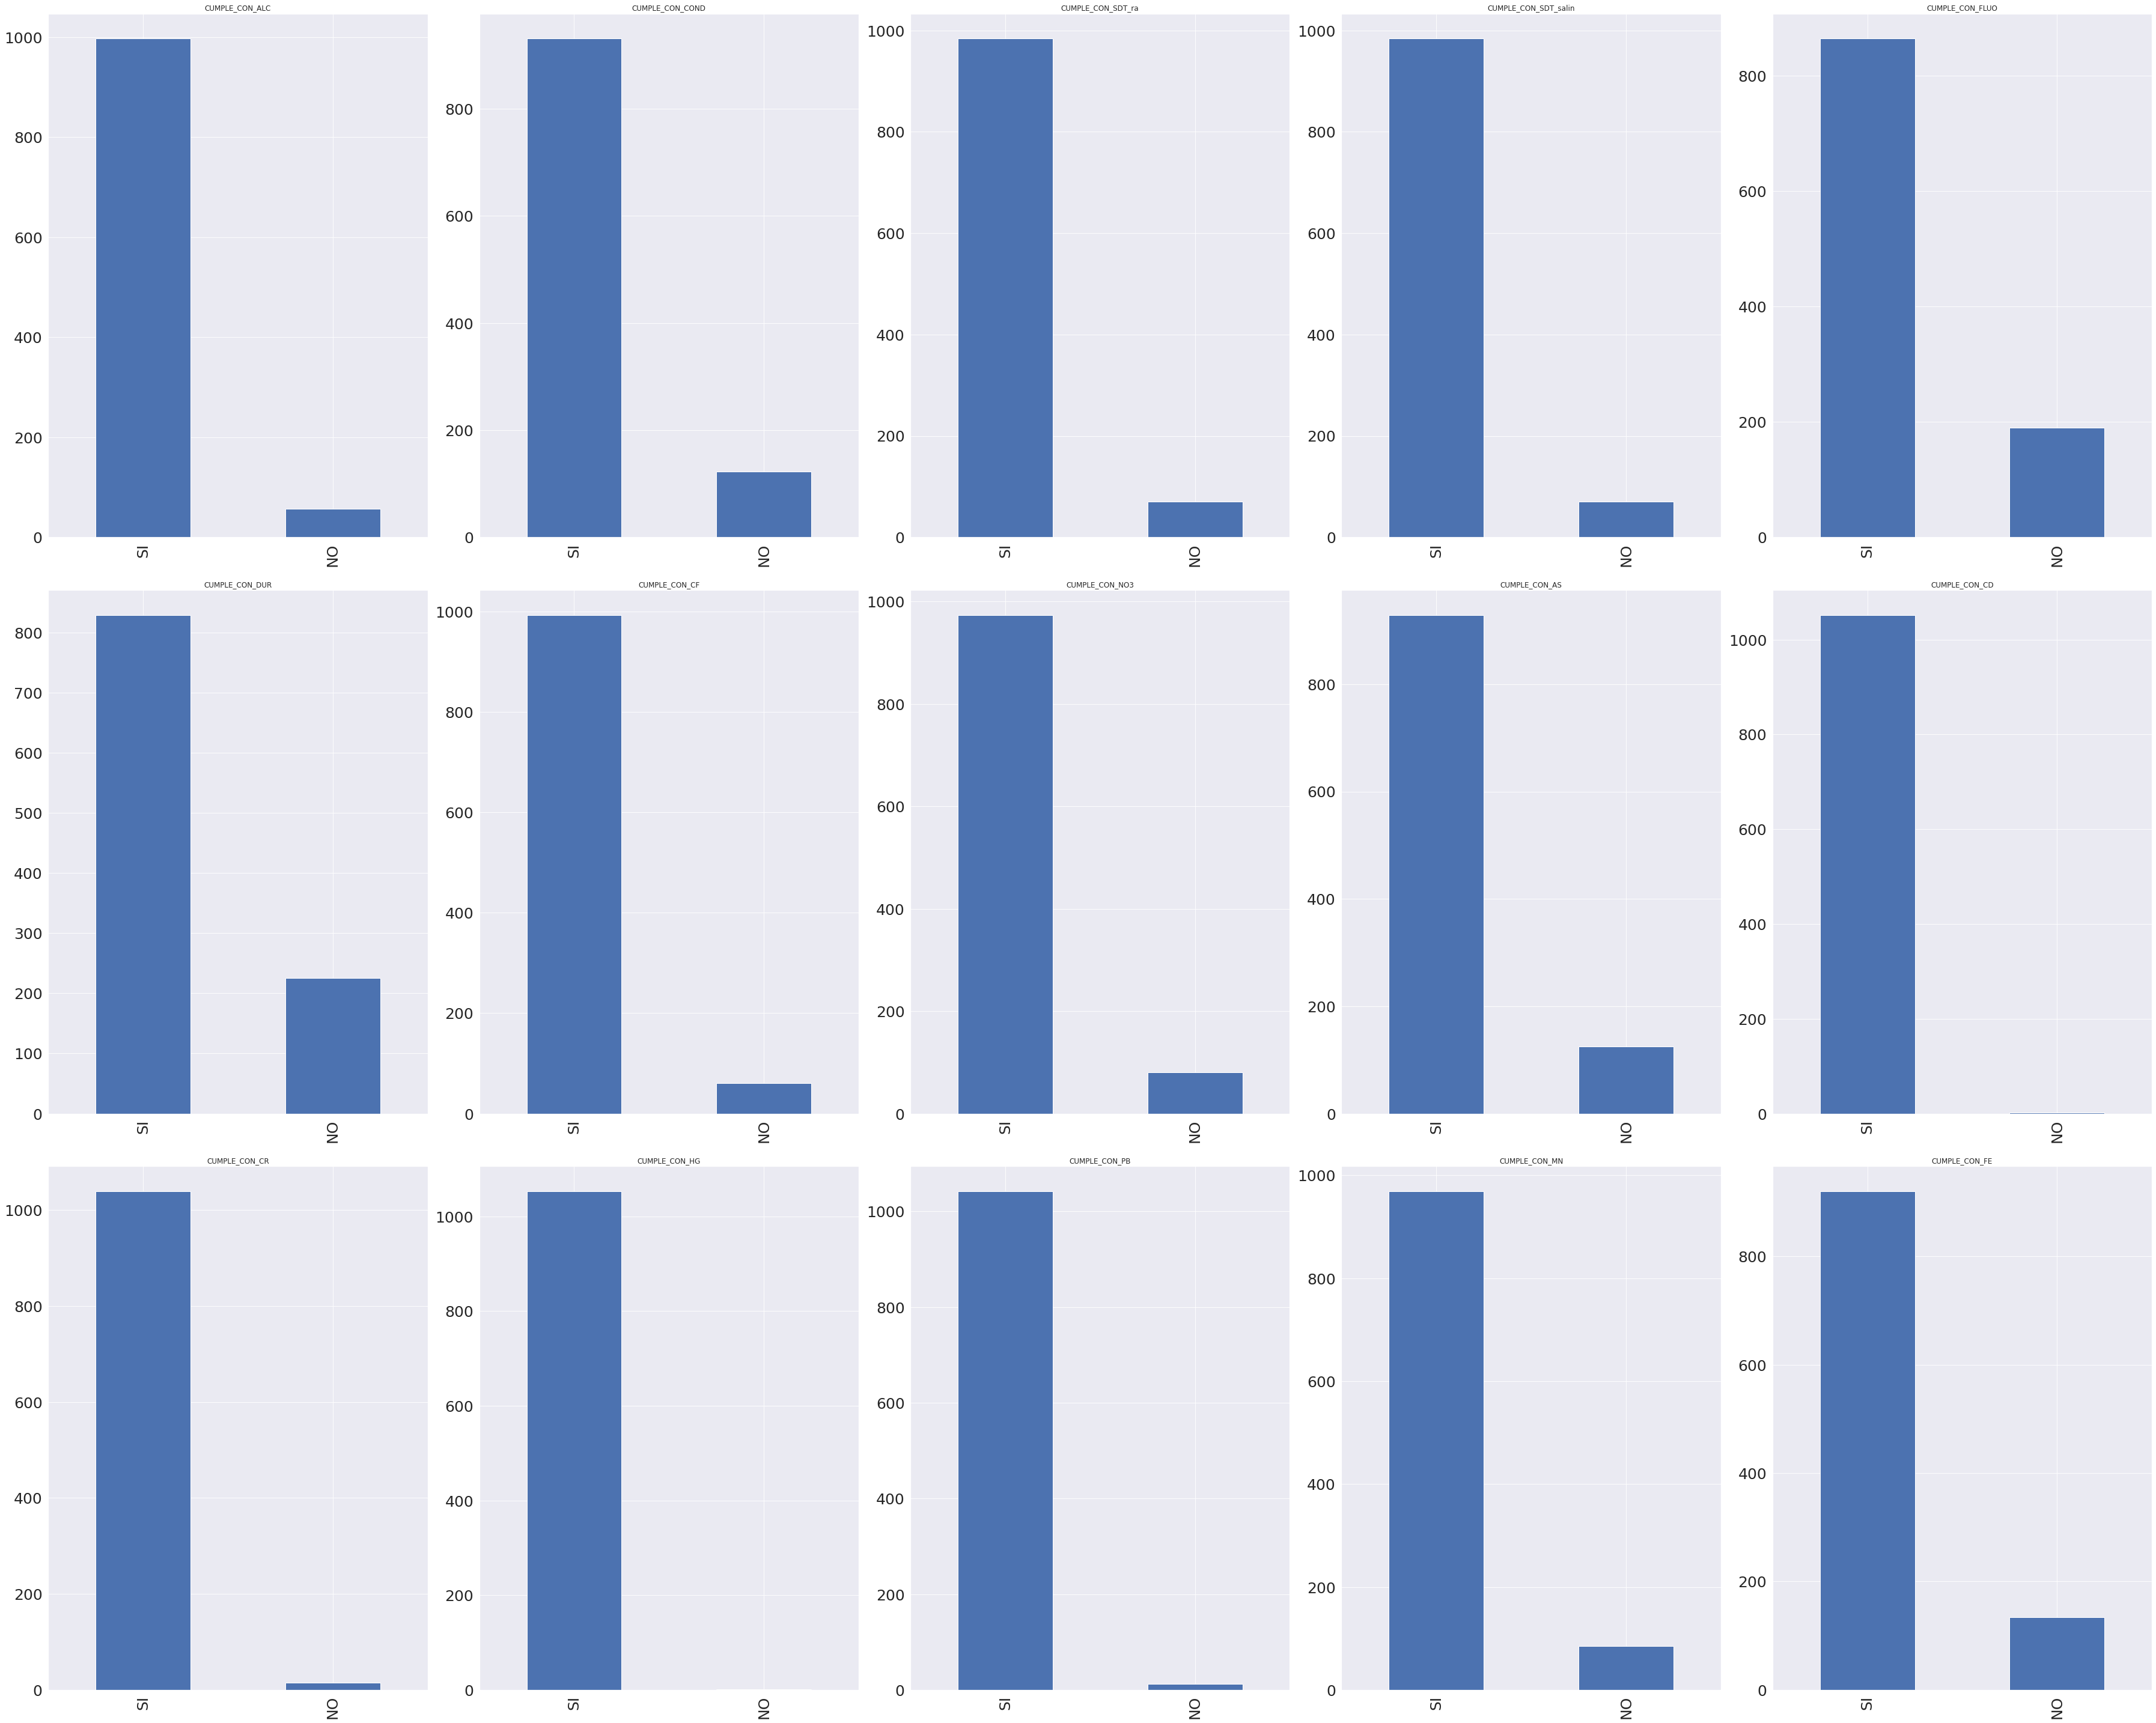

In [220]:
# Impresión de distribución de valores en variables categóoricas de calidad

## Creación de subplots
fig, ax = plt.subplots(3,5, figsize = (50,40))

import math
import itertools

## Creación de subset con columnas con partícula "CALIDAD"
cum_col = [col for col in df_sub.columns if col.startswith('CUMPLE')]

## Generación de los ejes pra subplots
filas = [0,1,2]
cols = [0,1,2,3,4]
sub = list(itertools.product(filas, cols))

## Impresión de bar chart por cada columna del DataFrame
for i, col in enumerate(cum_col):
  df_sub[col].value_counts().plot(kind = 'bar', ax = ax[sub[i][0]][sub[i][1]], title = col, fontsize = 25)

## Para evitar overlapping
fig.tight_layout(h_pad=2)

## Impresión de gráficas
plt.show()

Estas variables se denotan como variables categóricas binarias. Se puede notar que en algunas de ellas existe un vcalor "ND", es conveniente cambiar este valor y asignar sus registros a laclase mayoritaria. Al ser variables binarias y sin jerarquía, serí a conveniente la palicación de OneHotEnconding a esta columnas.

In [221]:
# Eliminación de valores "ND"
for col in cum_col:
  #df_sub[col] = df_sub[col].map({"ND":"SI","SI":"SI","NO":"NO"})
  df_sub.loc[df_sub[col] == 'ND',col] = 'SI'

In [222]:
# Comprobamos que lo valores fueron eliminados
for col in cum_col:
  print(df_sub[col].unique())

['SI' 'NO']
['SI' 'NO']
['SI' 'NO']
['SI' 'NO']
['SI' 'NO']
['SI' 'NO']
['SI' 'NO']
['SI' 'NO']
['SI' 'NO']
['SI' 'NO']
['SI' 'NO']
['SI' 'NO']
['SI' 'NO']
['SI' 'NO']
['SI' 'NO']


Resumen de acciones para preparación de los datos:

* cum_col -> OneHot encoding
* cal_col -> get_dummies
* num_cols -> MinMaxSCaler

In [223]:
# Revisamos si hemos considerado todas las variables
len(cum_col + cal_col + num_cols)- len(df_sub.columns)

-21

Con lo anterior comprobamos que hemos revisdo todas las variables ya que el -1 indica que solo una variable (la variable objetivo) es la única sin proprocesamiento realizado.

## Preparación de los datos

Como sabemos que estos datos serán utilizados para entrenar un modelo, decidimos que es más eficiente preparar un Pipeline con las transformaciones deseadas de los datos.

In [224]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = num_cols

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = cal_col + cum_col

catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = cum_col


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

# 3.- Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.

Para identificar si existe alguna relacion entre la calidad del agua y su ubicación geográfica, haremos uso de las latitudes y longitudes de cada observación.

In [225]:
latlong = df_sub[["LATITUD","LONGITUD"]]
latlong.describe()

,LATITUD,LONGITUD
count,1054.000000,1054.000000
mean,23.161796,-101.848270
std,3.875005,6.697568
min,14.561150,-116.664250
25%,20.224857,-105.385170
50%,22.640705,-102.170665
75%,25.508770,-98.971268
max,32.677713,-86.864120


In [226]:
## Cargamos información geográfica de México
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

In [227]:
df_sub['SEMAFORO'].value_counts()

Verde       427
Rojo        382
Amarillo    245
Name: SEMAFORO, dtype: int64

**Graficamos los puntos donde se ubican las aguas subterraneas sobre el mapa de México.**

Con lo cual, comenzamos a enteder la distribución de las mismas.

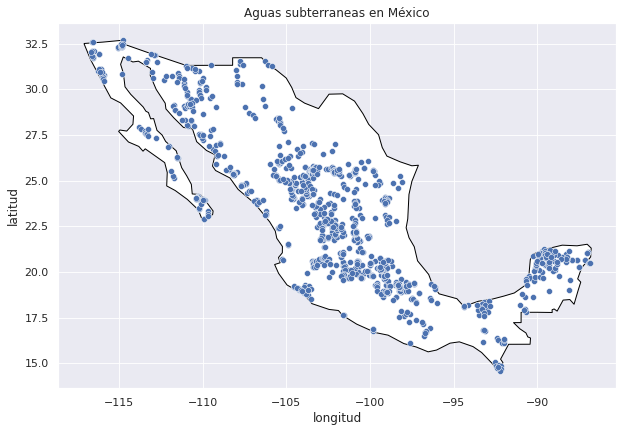

In [228]:
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
sns.scatterplot(x = latlong['LONGITUD'], y = latlong['LATITUD'])
gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas subterraneas en México')
plt.show()

**Graficamos los puntos donde se ubican las aguas subterraneas sobre el mapa de México, segmentadas por sus categorías del semaforo.**

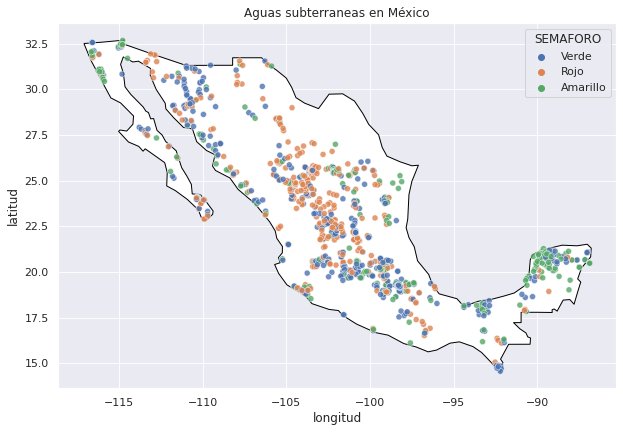

In [229]:
### Graficamos ahora correspondiente a los distintos niveles del semáforo
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
sns.scatterplot(x = latlong['LONGITUD'], y = latlong['LATITUD'], hue = df_sub['SEMAFORO'], alpha = 0.8)
gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas subterraneas en México')
plt.show()

El gráfico anterior, nos da una idea general de la distribución espacial de la información, no obstante, identificarlas con sus respectivas clases del semáforo nos permite observar la existe una elevada cantidad de aguas subterraneas rojas en el centro del país, que superan el 60% del total. 

En cuanto a las aguas amarillas, al parecer son más frecuentes en el sur este, mientras que las verdes de forma similar a las rojas comparten ubicaciones en el centro del país, pero su particularidad es que se encuentran un tanto más dispersas.


Por lo descrito anteriormente, es posible considerar dos posibles escenarios para la clusterización, una con las coordenadas sin las características del semáforo y otra con los valores mencionados. 

Como resultado, del primer análisis, sería posible identificar como agrupar las distintas localidades de aguas subterraneas para la administración, evaluación, destinamiento de presupuesto de los distintos gobiernos locales. Se podría con base a los clusters identificar que tipo de laboratorios deberían existir para desarrollaro estudios, considerando una posible ubicación el centriode, dado que reduciría costos o recursos, al estar lo más equidistante de los puntos.  


Para el segundo resultado, nos serviría para identificar si existen distitos tipos de concentraciones espaciales, que visualmente se pueden observar, pero podríamos entender mejor sus particularidades con esta otra clasificación.

**Clusterización:**

Se utilizaran k-medias y WCSS para seleccionar el númerio de clusters.

**Clusterización de observaciones sin ninguna variable de corte:**

In [230]:
wcss_store = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(latlong) 
    wcss_store.append(kmeans.inertia_)

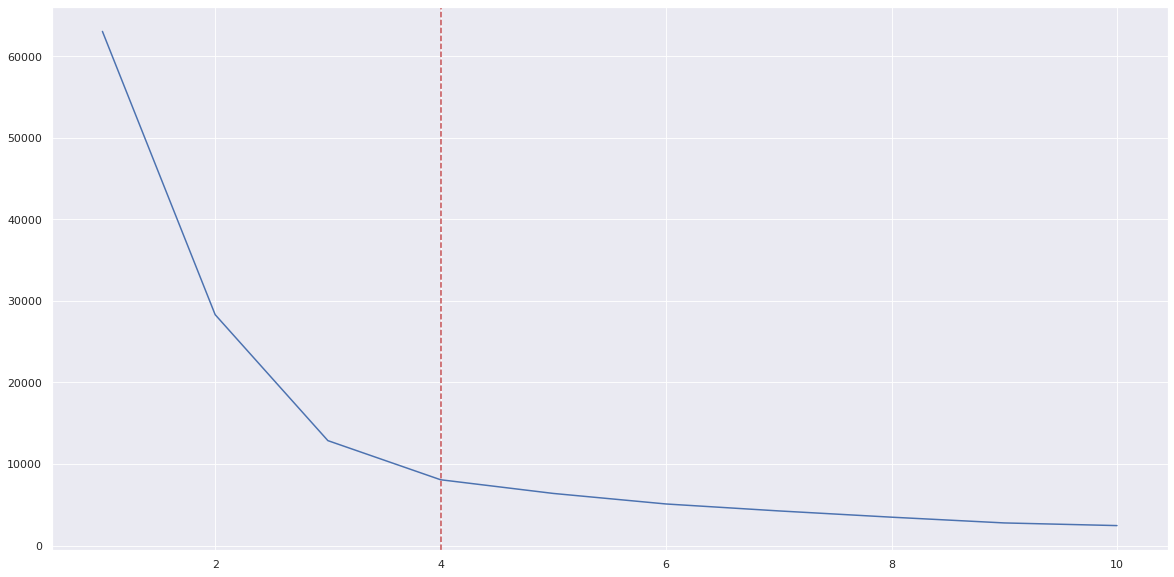

In [231]:
clusters_store = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(clusters_store, wcss_store)
plt.axvline(4, linestyle='--', color='r')

Se determina que el mejor número de clusters es 4, dado que posterirmente a este valor, no existen disminuciones relevantes de las distancias entre la ubicación de aguas residuales.

No obstante, puede ser interesante seleccionar otro número de grupos.

**Clusterización de observaciones segmentado por los niveles del semáforo:**

In [232]:
SFverde = df_sub['SEMAFORO'] == "Verde"
SFamarillo = df_sub['SEMAFORO'] == "Amarillo"
SFrojo = df_sub['SEMAFORO'] == "Rojo"

latlongVerde = latlong[SFverde]
latlongAmarillo = latlong[SFamarillo]
latlongRojo = latlong[SFrojo]

In [233]:
#########################################################
################### VERDE ###############################
#########################################################
wcss_storeV = [] 
for i in range(1, 11): 
    kmeansV = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeansV.fit(latlongVerde) 
    wcss_storeV.append(kmeansV.inertia_)

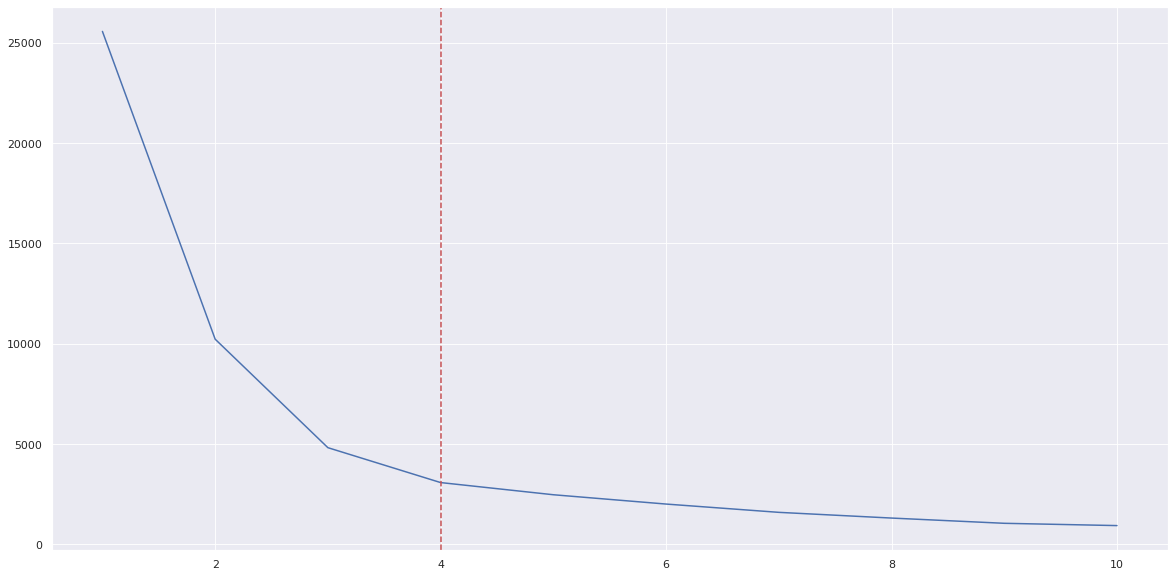

In [234]:
clusters_storeV = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(clusters_storeV, wcss_storeV)
plt.axvline(4, linestyle='--', color='r')

Se determina que el mejor número de clusters es 4 grupos.

In [235]:
### 4 clusters 
kmeans_storeV = KMeans(n_clusters=4, random_state=42)
kmeans_storeV.fit(latlongVerde)
centroidesV = kmeans_storeV.cluster_centers_

In [236]:
############################################################
################### AMARILLO ###############################
############################################################
wcss_storeA = [] 
for i in range(1, 11): 
    kmeansA = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeansA.fit(latlongAmarillo) 
    wcss_storeA.append(kmeansA.inertia_)

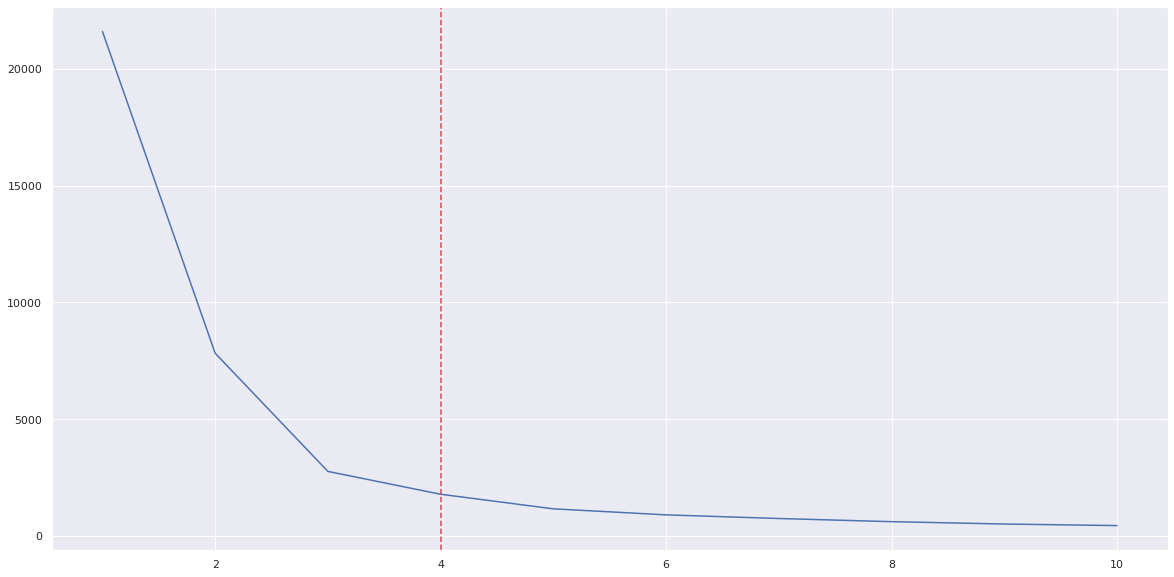

In [237]:
clusters_storeA = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(clusters_storeA, wcss_storeA)
plt.axvline(4, linestyle='--', color='r')

Se determina que el mejor número de clusters es 4 grupos.

In [238]:
### 4 clusters 
kmeans_storeA = KMeans(n_clusters=4, random_state=42)
kmeans_storeA.fit(latlongAmarillo)
centroidesA = kmeans_storeA.cluster_centers_

In [239]:
#########################################################
################### ROJO ################################
#########################################################
wcss_storeR = [] 
for i in range(1, 11): 
    kmeansR = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeansR.fit(latlongRojo) 
    wcss_storeR.append(kmeansR.inertia_)

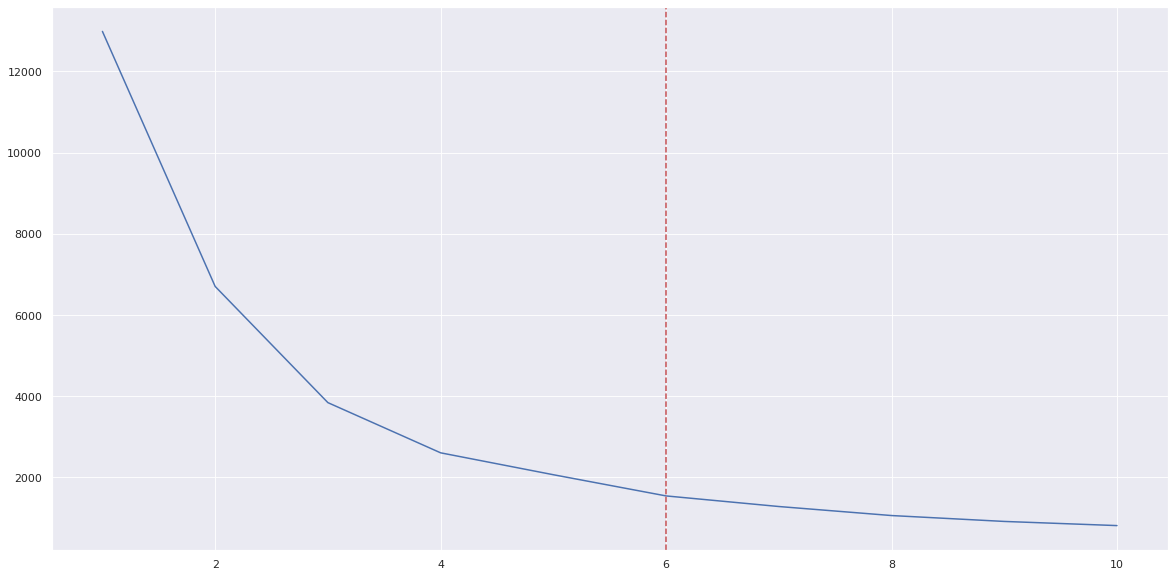

In [240]:
clusters_storeR = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(clusters_storeR, wcss_storeR)
plt.axvline(6, linestyle='--', color='r')

Se determina que el mejor número de clusters es 6 grupos.

In [241]:
### 4 clusters 
kmeans_storeR = KMeans(n_clusters=6, random_state=42)
kmeans_storeR.fit(latlongRojo)
centroidesR = kmeans_storeR.cluster_centers_

# 4.- Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

Al obstenerse diferentes clusters, logramos evidenciar que sería muy útil que Baja California logre tener su propio cluster, no obstante, no se logra este objetivo incluso si elevamos el valor hasta los 6 grupos, como se muestra a continuación.

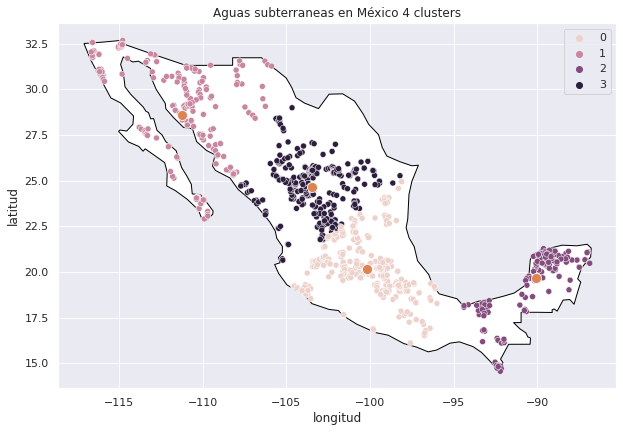

In [242]:
### 4 clusters 
kmeans_store = KMeans(n_clusters=4, random_state=42)
kmeans_store.fit(latlong)
centroides = kmeans_store.cluster_centers_

fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
sns.scatterplot(x = latlong['LONGITUD'], y = latlong['LATITUD'], hue = kmeans_store.labels_)
sns.scatterplot(x = centroides[:,1], y = centroides[:,0], s=100)
gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas subterraneas en México 4 clusters')
plt.show()

In [243]:
df_cluster = latlong.copy()
df_cluster['cluster'] = kmeans_store.labels_
df_cluster['SEMAFORO'] = df_sub['SEMAFORO']
resultado_final = df_cluster[['SEMAFORO','cluster']].groupby(['SEMAFORO','cluster'], as_index = False).size()

5    263
0    239
3    171
1    159
2    131
4     91
Name: cluster, dtype: int64
Verde       427
Rojo        382
Amarillo    245
Name: SEMAFORO, dtype: int64


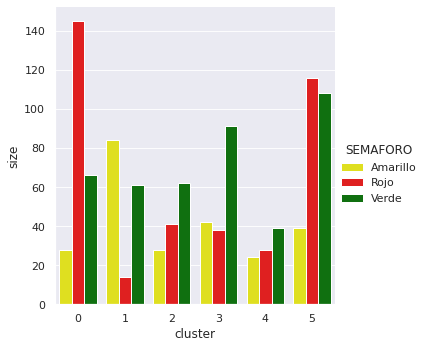

In [257]:
print(df_cluster['cluster'].value_counts())
print(df_cluster['SEMAFORO'].value_counts())
sns.catplot(x = 'cluster', y = 'size', hue = 'SEMAFORO', data = resultado_final, kind = 'bar', palette = ['yellow','red','green'])
plt.show()

Los resultados obtenidos nos muestran que el cluster 0, presenta una muy baja concentración de aguas rojas con un 9% y una mediana concentración de aguas verdes (37%).

En el caso del cluster 3, contiene el mayor número de aguas verdes con un porcentaje correspondiente al 47% (179). Finalmente el cluster 1, muestra la más alta presencia de aguas rojas con el 57% del total de aguas presentes en el cluster, pero que equivale al 49% del total disponibles en el estudio.

 Por los resultados obtenidos, puede ser interesante concentrar en determinados clusters, ciertos tipos de aguas, para que esto facilite su administracion.

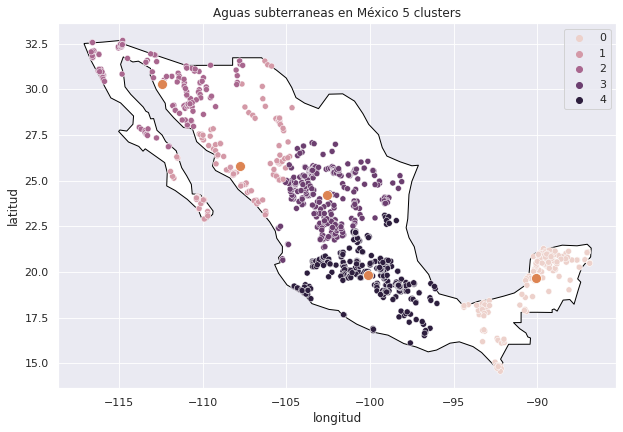

In [245]:
### 5 clusters 
kmeans_store = KMeans(n_clusters=5, random_state=42)
kmeans_store.fit(latlong)
centroides = kmeans_store.cluster_centers_

fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
sns.scatterplot(x = latlong['LONGITUD'], y = latlong['LATITUD'], hue = kmeans_store.labels_)
sns.scatterplot(x = centroides[:,1], y = centroides[:,0], s=100)
gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas subterraneas en México 5 clusters')
plt.show()

In [246]:
df_cluster = latlong.copy()
df_cluster['cluster'] = kmeans_store.labels_
df_cluster['SEMAFORO'] = df_sub['SEMAFORO']
resultado_final = df_cluster[['SEMAFORO','cluster']].groupby(['SEMAFORO','cluster'], as_index = False).size()

5    263
0    239
3    171
1    159
2    131
4     91
Name: cluster, dtype: int64


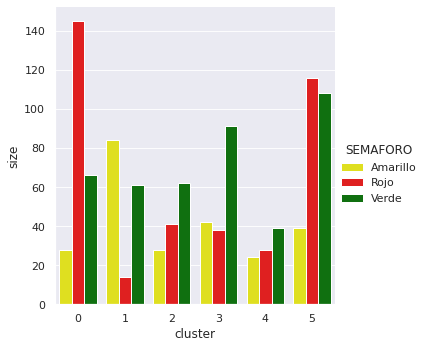

In [258]:
print(df_cluster['cluster'].value_counts())
sns.catplot(x = 'cluster', y = 'size', hue = 'SEMAFORO', data = resultado_final, kind = 'bar', palette = ['yellow','red','green'])
plt.show()

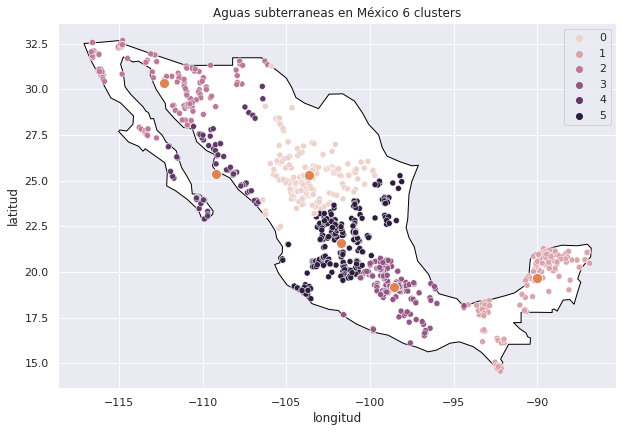

In [248]:
### 6 clusters 
kmeans_store = KMeans(n_clusters=6, random_state=42)
kmeans_store.fit(latlong)
centroides = kmeans_store.cluster_centers_

fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
sns.scatterplot(x = latlong['LONGITUD'], y = latlong['LATITUD'], hue = kmeans_store.labels_)
sns.scatterplot(x = centroides[:,1], y = centroides[:,0], s=100)
gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas subterraneas en México 6 clusters')
plt.show()

In [249]:
df_cluster = latlong.copy()
df_cluster['cluster'] = kmeans_store.labels_
df_cluster['SEMAFORO'] = df_sub['SEMAFORO']
resultado_final = df_cluster[['SEMAFORO','cluster']].groupby(['SEMAFORO','cluster'], as_index = False).size()

5    263
0    239
3    171
1    159
2    131
4     91
Name: cluster, dtype: int64


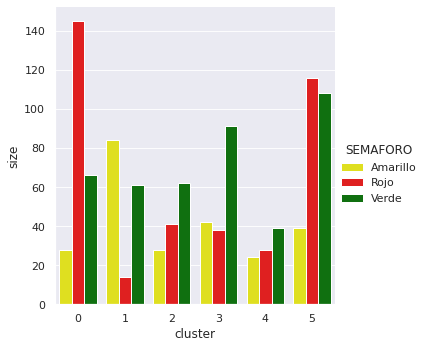

In [259]:
print(df_cluster['cluster'].value_counts())
sns.catplot(x = 'cluster', y = 'size', hue = 'SEMAFORO', data = resultado_final, kind = 'bar', palette = ['yellow','red','green'])
plt.show()

Posterior al entendimiento agregado de las aguas subterraneas, ahora tratamos de entender si existirían distintos puntos de concentración para cada clase del semáforo. Posiblemente, más a la derecha, izquierda o al norte de las aguas verdes, amarillas o rojas, se presentan alguna en especial.

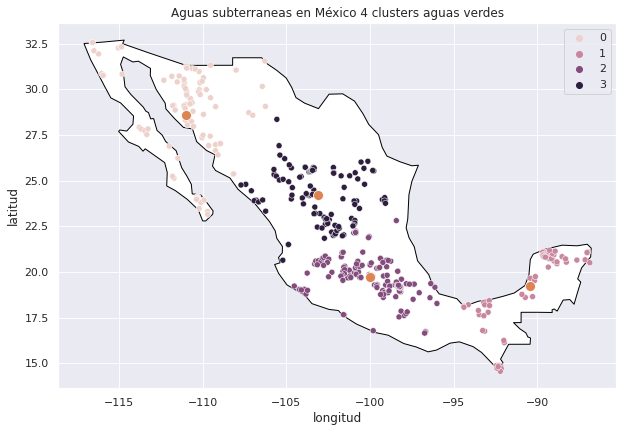

In [251]:
#### Gráfica de aguas verdes
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
sns.scatterplot(x = latlongVerde['LONGITUD'], y = latlongVerde['LATITUD'], hue = kmeans_storeV.labels_)
sns.scatterplot(x = centroidesV[:,1], y = centroidesV[:,0], s=100)
gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas subterraneas en México 4 clusters aguas verdes')
plt.show()

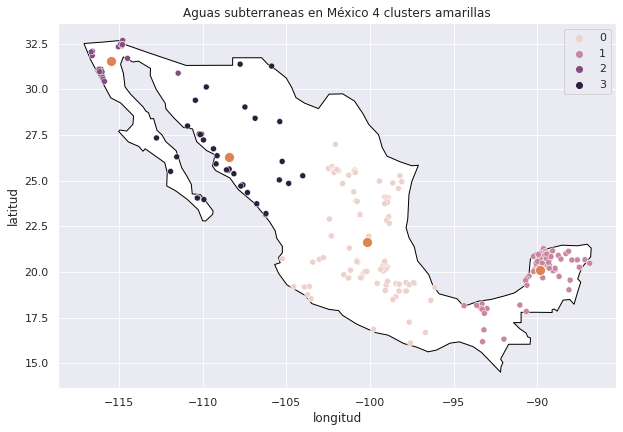

In [252]:
#### Gráfica de aguas amarillas
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
sns.scatterplot(x = latlongAmarillo['LONGITUD'], y = latlongAmarillo['LATITUD'], hue = kmeans_storeA.labels_)
sns.scatterplot(x = centroidesA[:,1], y = centroidesA[:,0], s=100)
gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas subterraneas en México 4 clusters amarillas')
plt.show()

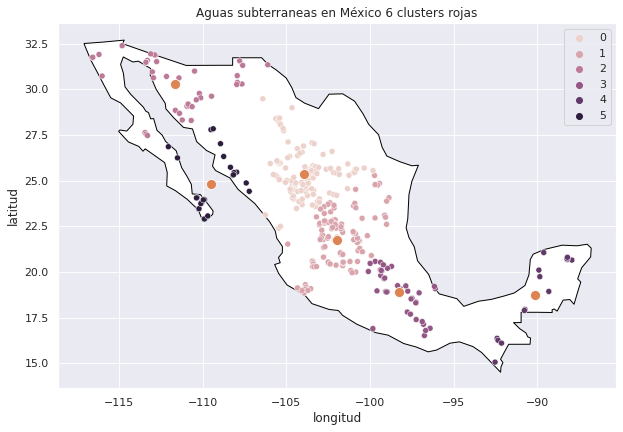

In [253]:
#### Gráfica de aguas rojas
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
sns.scatterplot(x = latlongRojo['LONGITUD'], y = latlongRojo['LATITUD'], hue = kmeans_storeR.labels_)
sns.scatterplot(x = centroidesR[:,1], y = centroidesR[:,0], s=100)
gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas subterraneas en México 6 clusters rojas')
plt.show()

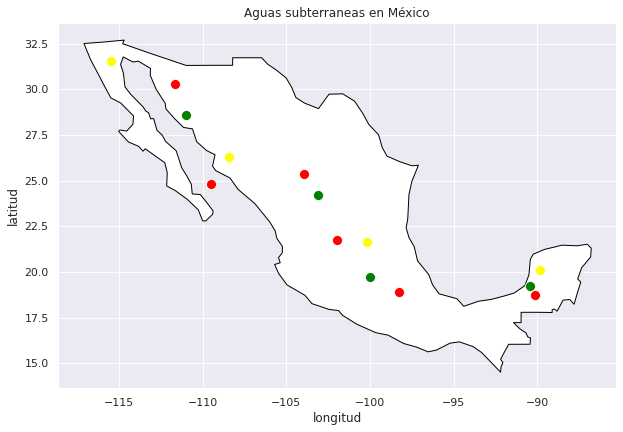

In [254]:
### Graficamos ahora correspondiente a los distintos niveles del semáforo
fig, gax = plt.subplots(figsize=(10,10))
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
#sns.scatterplot(x = latlong['LONGITUD'], y = latlong['LATITUD'], hue = df_sub['SEMAFORO'], alpha = 0.8)
sns.scatterplot(x = centroidesR[:,1], y = centroidesR[:,0], s=100, color = 'red')
sns.scatterplot(x = centroidesV[:,1], y = centroidesV[:,0], s=100, color = 'green')
sns.scatterplot(x = centroidesA[:,1], y = centroidesA[:,0], s=100, color = 'yellow')
gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Aguas subterraneas en México')
plt.show()

**Conclusiones finales de cluster individuales:**

Graficar los centriodes de cada uno de los clusters correspondientes a las categorías del semáforo, nos permite determinar la existencia de diferentes puntos de concentración, es decir, se evidencian los desplazamientos de concentración entre ellos.

Esto ya era de esperarse por los resultados anteriores.


